## Housing Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

1. Data Understanding and Exploration


Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
train = pd.read_csv("C:/Users/SHWETA/Dropbox/Upgrad course/Advanced regression/train.csv")

In [3]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# head
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
train.shape

(1460, 81)

In [6]:
#summary statistics
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
#coutning on the missing values
pd.options.display.min_rows = 115
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

Understanding the Data Dictionary


The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [8]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
train['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [9]:
# MSZoning: Identifies the general zoning classification of the sale.
train['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
# Street: Type of road access to property
train['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [11]:
#Alley: Type of alley access to property
train['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

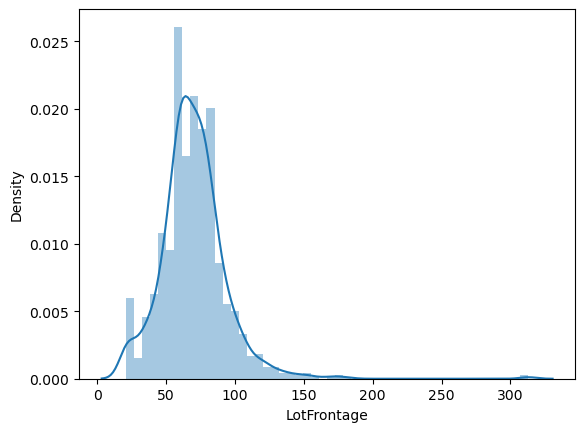

In [12]:
# LotFrontage: Linear feet of street connected to property
sns.distplot(train['LotFrontage'])
plt.show()

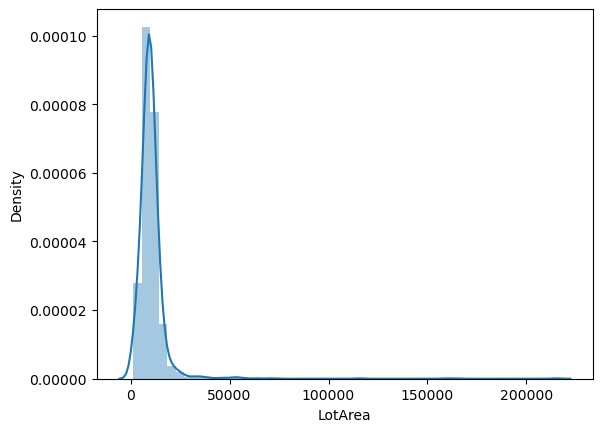

In [13]:
#LotArea: Lot size in square feet
sns.distplot(train['LotArea'])
plt.show()

In [14]:
#LotShape: General shape of property
train['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [15]:
#LandContour: Flatness of the property
train['LandContour'].astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [16]:
#Utilities: Type of utilities available
train['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [17]:
#LotConfig: Lot configuration
train['LotConfig'].astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [18]:
#LandSlope: Slope of property
train['LandSlope'].astype('category').value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [19]:
#Neighborhood: Physical locations within Ames city limits
train['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [20]:
#Condition1: Proximity to various conditions
train['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [21]:
#Condition2: Proximity to various conditions (if more than one is present)
train['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [22]:
#BldgType: Type of dwelling
train['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [23]:
#HouseStyle: Style of dwelling
train['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [24]:
#OverallQual: Rates the overall material and finish of the house
train['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [25]:
#OverallCond: Rates the overall condition of the house
train['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

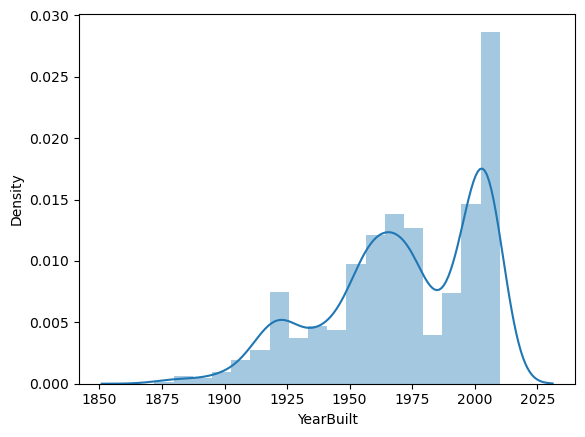

In [26]:
#YearBuilt: Original construction date
sns.distplot(train['YearBuilt'])
plt.show()

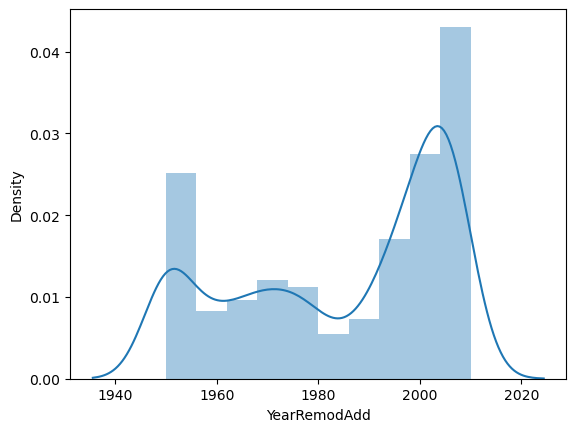

In [27]:
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
sns.distplot(train['YearRemodAdd'])
plt.show()

In [28]:
#RoofStyle: Type of roof
train['RoofStyle'].astype('category').value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [29]:
#RoofMatl: Roof material
train['RoofMatl'].astype('category').value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [30]:
#Exterior1st: Exterior covering on house
train['Exterior1st'].astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [31]:
#Exterior2nd: Exterior covering on house (if more than one material)
train['Exterior2nd'].astype('category').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [32]:
#MasVnrType: Masonry veneer type
train['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

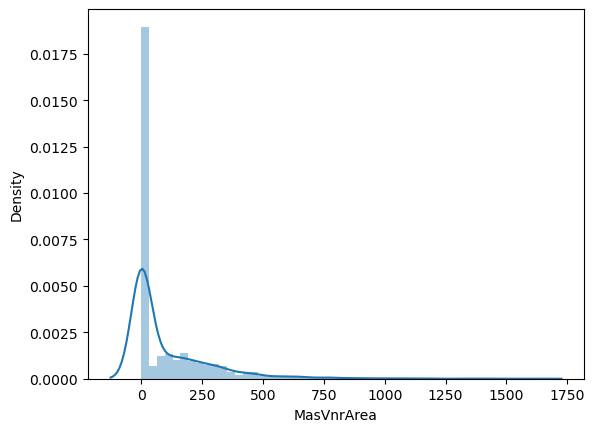

In [33]:
#MasVnrArea: Masonry veneer area in square feet
sns.distplot(train['MasVnrArea'])
plt.show()

In [34]:
#ExterQual: Evaluates the quality of the material on the exterior 
train['ExterQual'].astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [35]:
#ExterCond: Evaluates the present condition of the material on the exterior
train['ExterCond'].astype('category').value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [36]:
#Foundation: Type of foundation
train['Foundation'].astype('category').value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [37]:
#BsmtQual: Evaluates the height of the basement
train['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [38]:
#BsmtCond: Evaluates the general condition of the basement
train['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [39]:
#BsmtExposure: Refers to walkout or garden level walls
train['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [40]:
#BsmtFinType1: Rating of basement finished area
train['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

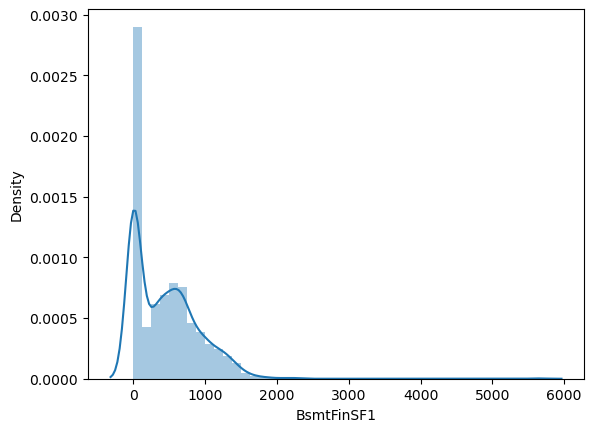

In [41]:
#BsmtFinSF1: Type 1 finished square feet
sns.distplot(train['BsmtFinSF1'])
plt.show()

In [42]:
#BsmtFinType2: Rating of basement finished area (if multiple types)
train['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

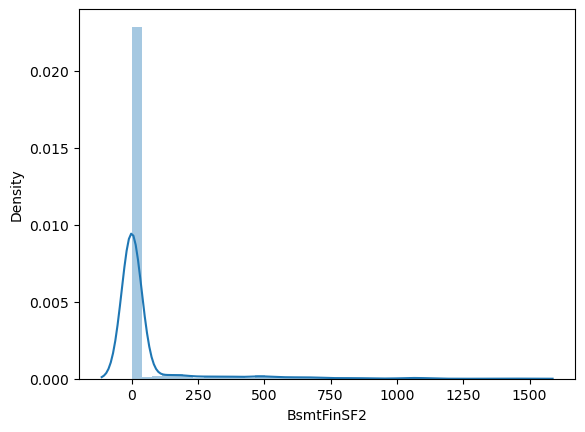

In [43]:
#BsmtFinSF2: Type 2 finished square feet
sns.distplot(train['BsmtFinSF2'])
plt.show()

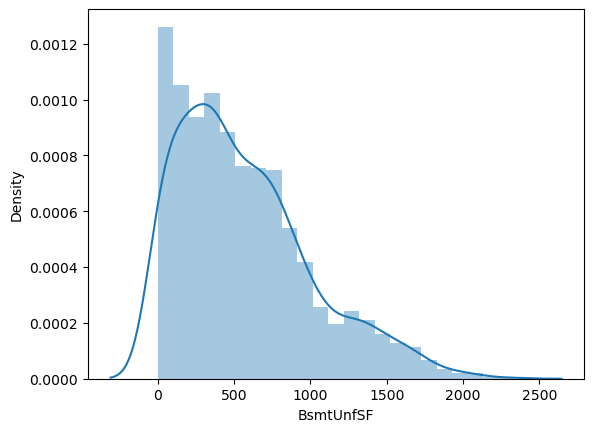

In [44]:
#BsmtUnfSF: Unfinished square feet of basement area
sns.distplot(train['BsmtUnfSF'])
plt.show()

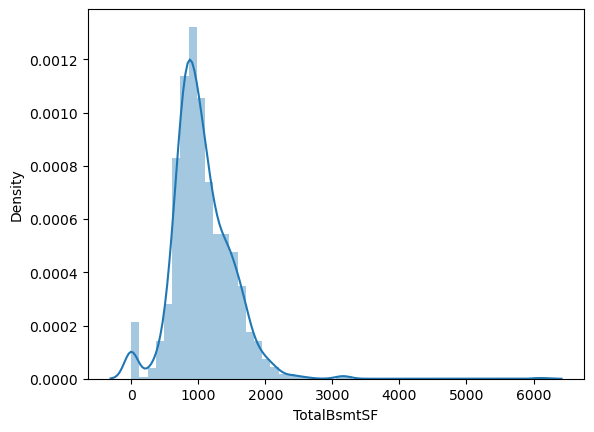

In [45]:
#TotalBsmtSF: Total square feet of basement area
sns.distplot(train['TotalBsmtSF'])
plt.show()

In [46]:
#Heating: Type of heating
train['Heating'].astype('category').value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [47]:
#HeatingQC: Heating quality and condition
train['HeatingQC'].astype('category').value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [48]:
#CentralAir: Central air conditioning
train['CentralAir'].astype('category').value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [49]:
#Electrical: Electrical system
train['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

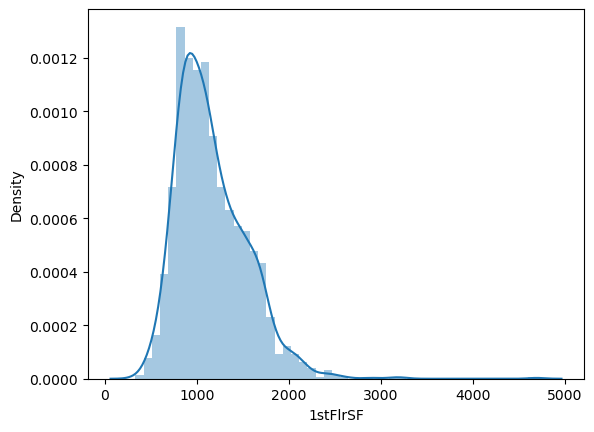

In [50]:
#1stFlrSF: First Floor square feet
sns.distplot(train['1stFlrSF'])
plt.show()

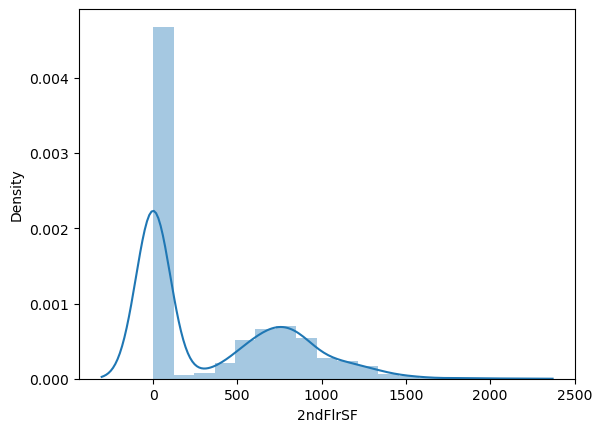

In [51]:
#2ndFlrSF: Second floor square feet
sns.distplot(train['2ndFlrSF'])
plt.show()

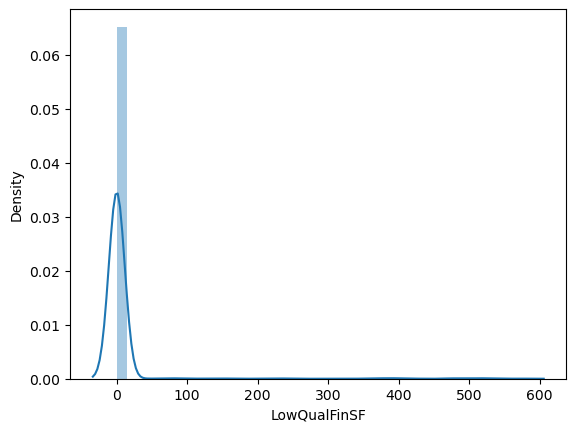

In [52]:
#LowQualFinSF: Low quality finished square feet (all floors)
sns.distplot(train['LowQualFinSF'])
plt.show()

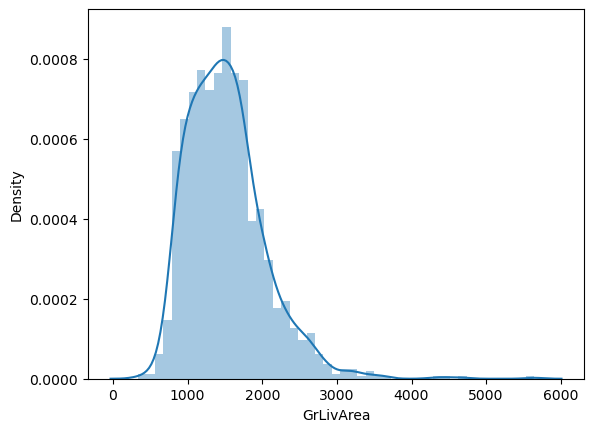

In [53]:
#GrLivArea: Above grade (ground) living area square feet
sns.distplot(train['GrLivArea'])
plt.show()

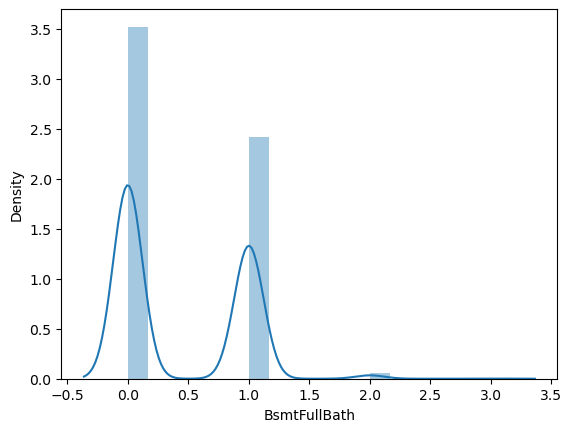

In [54]:
#BsmtFullBath: Basement full bathrooms
sns.distplot(train['BsmtFullBath'])
plt.show()

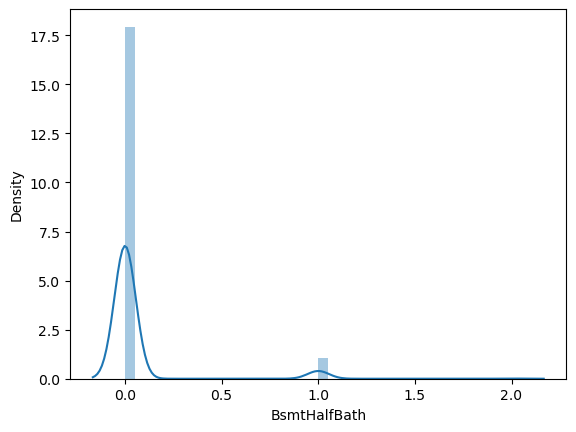

In [55]:
#BsmtHalfBath: Basement half bathrooms
sns.distplot(train['BsmtHalfBath'])
plt.show()

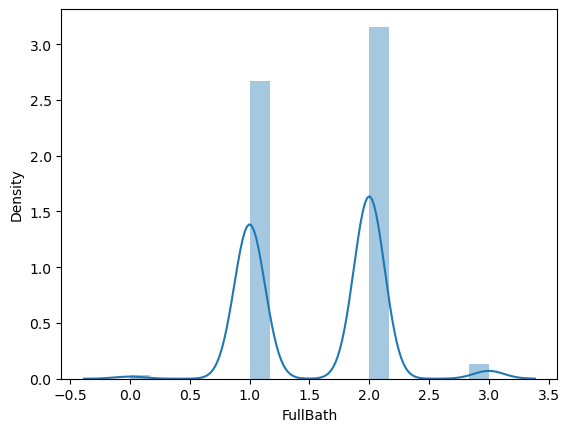

In [56]:
#FullBath: Full bathrooms above grade
sns.distplot(train['FullBath'])
plt.show()

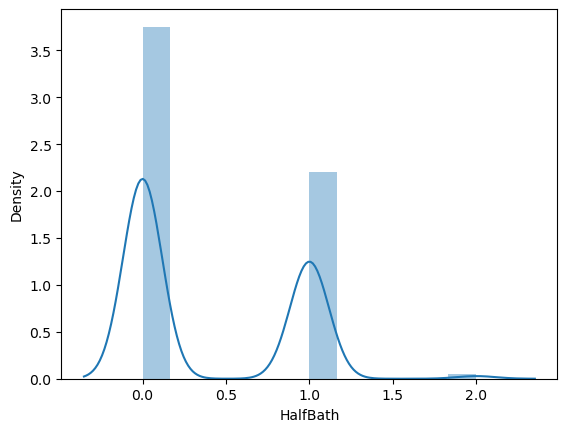

In [57]:
#HalfBath: Half baths above grade
sns.distplot(train['HalfBath'])
plt.show()

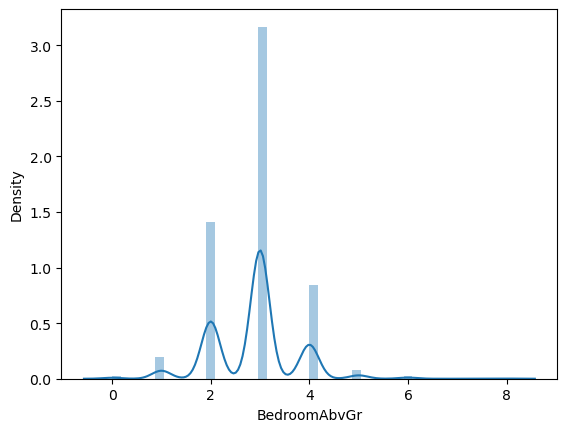

In [58]:
#BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
sns.distplot(train['BedroomAbvGr'])
plt.show()


In [59]:
#Bedrooms above grade (does NOT include basement bedrooms)
train['BedroomAbvGr'].astype('category').value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [60]:
#FullBath: Full bathrooms above grade
train['FullBath'].astype('category').value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [61]:
#HalfBath: Half baths above grade
train['HalfBath'].astype('category').value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [62]:
#BsmtHalfBath: Basement half bathrooms
train['BsmtHalfBath'].astype('category').value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [63]:
#BsmtFullBath: Basement full bathrooms
train['BsmtFullBath'].astype('category').value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

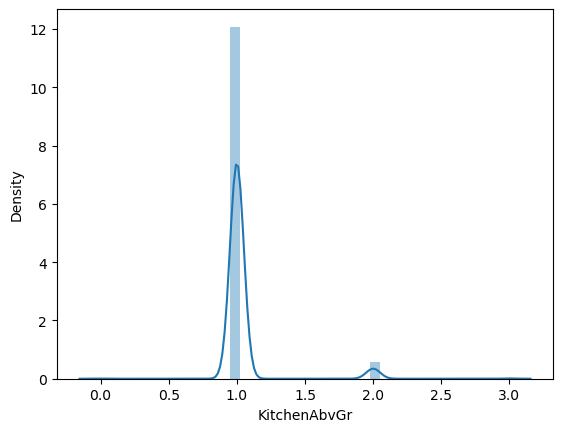

In [64]:
#KitchenAbvGr: Kitchens above grade
sns.distplot(train['KitchenAbvGr'])
plt.show()

In [65]:
##KitchenAbvGr: Kitchens above grade
train['KitchenAbvGr'].astype('category').value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [66]:
#KitchenQual: Kitchen quality
train['KitchenQual'].astype('category').value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

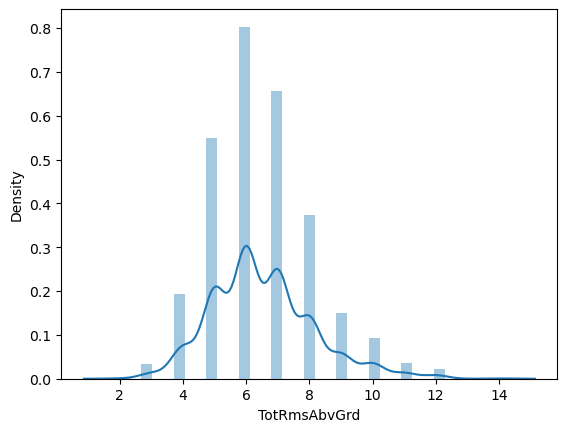

In [67]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
sns.distplot(train['TotRmsAbvGrd'])
plt.show()

In [68]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
train['TotRmsAbvGrd'].astype('category').value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [69]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
train['Functional'].astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

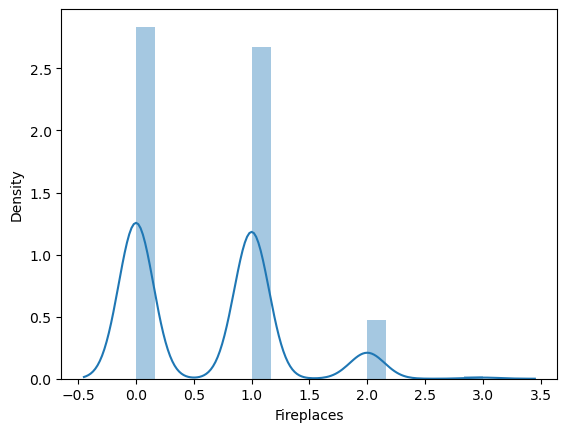

In [70]:
#Fireplaces: Number of fireplaces
sns.distplot(train['Fireplaces'])
plt.show()

In [71]:
#FireplaceQu: Fireplace quality
train['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [72]:
#GarageType: Garage location
train['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

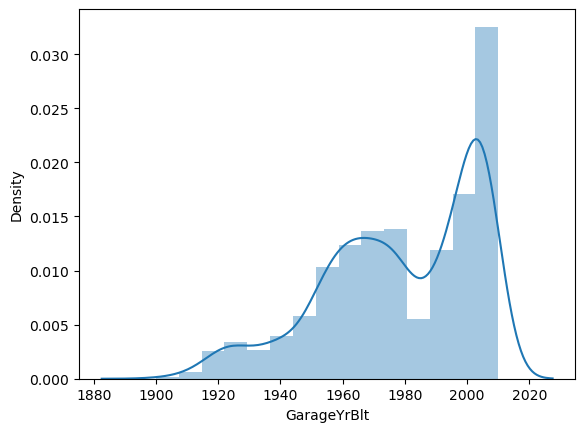

In [73]:
#GarageYrBlt: Year garage was built
sns.distplot(train['GarageYrBlt'])
plt.show()

In [74]:
#GarageFinish: Interior finish of the garage
train['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

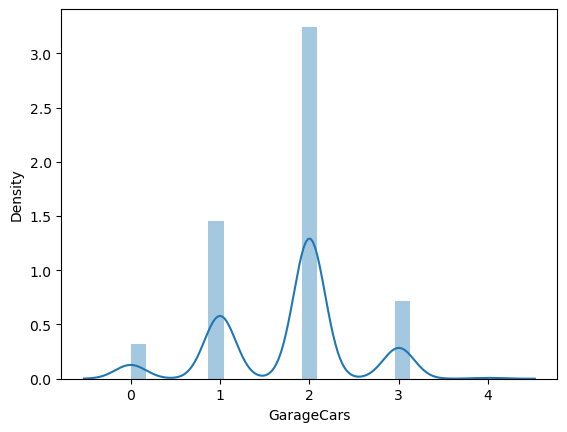

In [75]:
#GarageCars: Size of garage in car capacity
sns.distplot(train['GarageCars'])
plt.show()

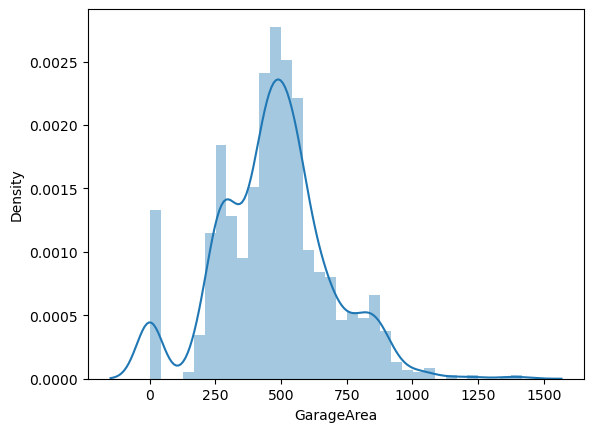

In [76]:
#GarageArea: Size of garage in square feet
sns.distplot(train['GarageArea'])
plt.show()

In [77]:
#GarageQual: Garage quality
train['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [78]:
#GarageCond: Garage condition
train['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [79]:
#PavedDrive: Paved driveway
train['PavedDrive'].astype('category').value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

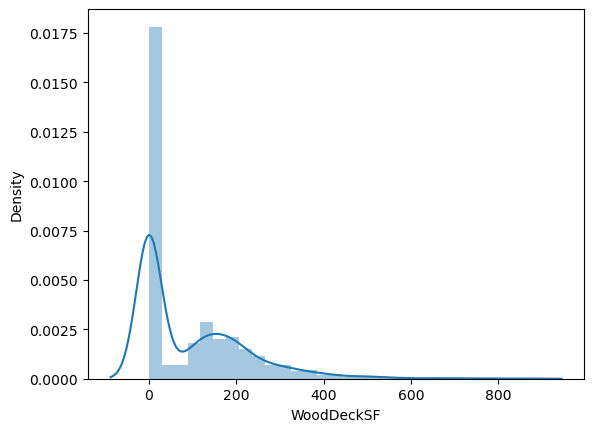

In [80]:
#WoodDeckSF: Wood deck area in square feet
sns.distplot(train['WoodDeckSF'])
plt.show()

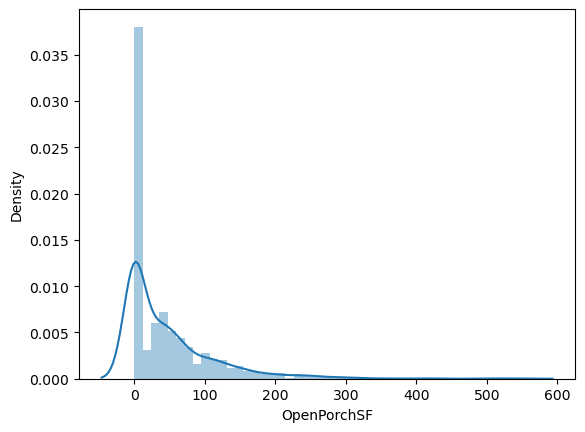

In [81]:
#OpenPorchSF: Open porch area in square feet
sns.distplot(train['OpenPorchSF'])
plt.show()

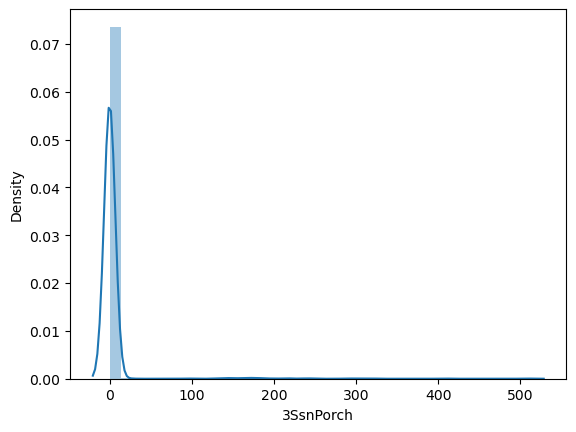

In [82]:
#3SsnPorch: Three season porch area in square feet
sns.distplot(train['3SsnPorch'])
plt.show()

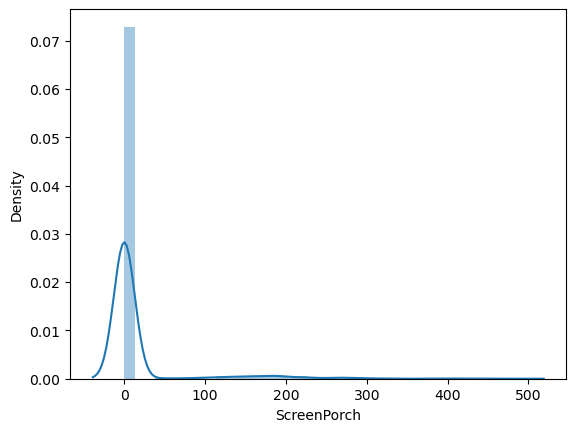

In [83]:
#ScreenPorch: Screen porch area in square feet
sns.distplot(train['ScreenPorch'])
plt.show()

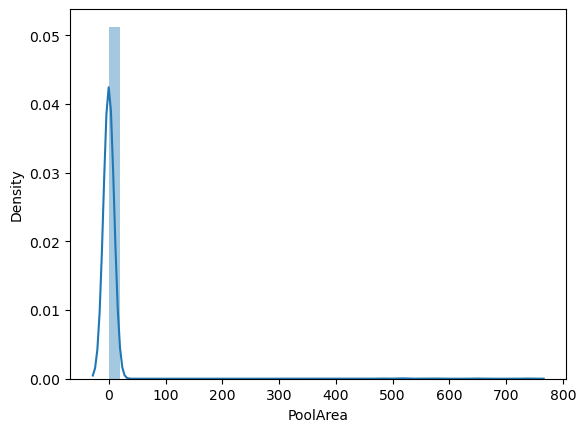

In [84]:
#PoolArea: Pool area in square feet
sns.distplot(train['PoolArea'])
plt.show()

In [85]:
#PoolQC: Pool quality
train['PoolQC'].astype('category').value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [86]:
#Fence: Fence quality
train['Fence'].astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [87]:
#MiscFeature: Miscellaneous feature not covered in other categories
train['MiscFeature'].astype('category').value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

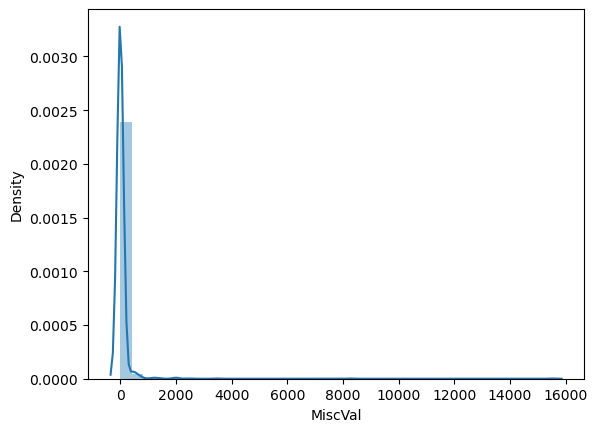

In [88]:
#MiscVal: $Value of miscellaneous feature
sns.distplot(train['MiscVal'])
plt.show()

In [89]:
#MoSold: Month Sold (MM)
train['MoSold'].astype('category').value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

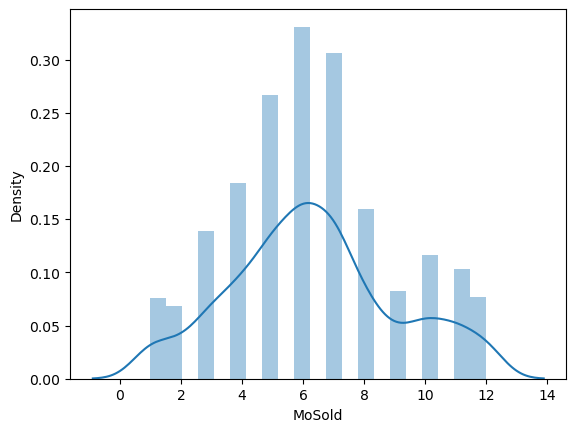

In [90]:
#MoSold: Month Sold (MM)
sns.distplot(train['MoSold'])
plt.show()

In [91]:
#YrSold: Year Sold (YYYY)
train['YrSold'].astype('category').value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

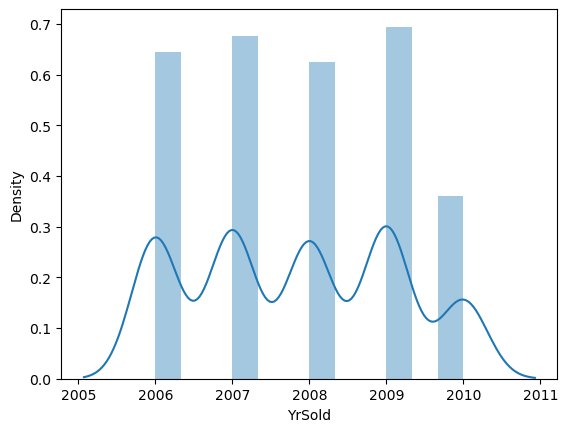

In [92]:
#YrSold: Year Sold (YYYY)
sns.distplot(train['YrSold'])
plt.show()

In [93]:
#SaleType: Type of sale
train['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [94]:
#SaleCondition: Condition of sale
train['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

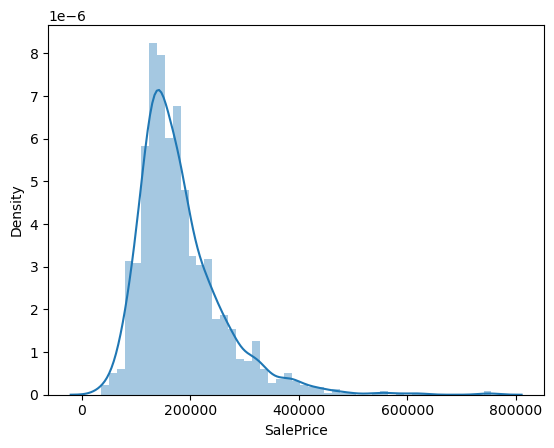

In [95]:
#SalePrice:sale price of house
sns.distplot(train['SalePrice'])
plt.show()

In [96]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [97]:
# all numeric (float and int) variables in the dataset
train_numeric = train.select_dtypes(include=['float64', 'int64'])
train_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

Here, although the variable MSSubClass,OverallQual,OverallCond is numeric (int), we'd rather treat it as categorical since it has only 6 discrete values. Also, we do not want 'ID'.

In [98]:
# all numeric (float and int) variables in the dataset
train_numeric = train_numeric.drop(['MSSubClass','OverallQual','OverallCond','Id'], axis=1)
train_numeric.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  WoodDeckSF  OpenPorchSF  \
0           0        150          856       856  ...           0           61   
1           0        284         1262      1262  ...         298            0   
2           0        434          920       920  ...           0           42   
3           0        540          756       961  ...           0           35   
4           0        490         1145      1145  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 34 columns]

In [99]:
# correlation matrix
cor = train_numeric.corr()
cor

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage       1.000000  0.426095   0.123349      0.088866    0.193458   
LotArea           0.426095  1.000000   0.014228      0.013788    0.104160   
YearBuilt         0.123349  0.014228   1.000000      0.592855    0.315707   
YearRemodAdd      0.088866  0.013788   0.592855      1.000000    0.179618   
MasVnrArea        0.193458  0.104160   0.315707      0.179618    1.000000   
BsmtFinSF1        0.233633  0.214103   0.249503      0.128451    0.264736   
BsmtFinSF2        0.049900  0.111170  -0.049107     -0.067759   -0.072319   
BsmtUnfSF         0.132644 -0.002618   0.149040      0.181133    0.114442   
TotalBsmtSF       0.392075  0.260833   0.391452      0.291066    0.363936   
1stFlrSF          0.457181  0.299475   0.281986      0.240379    0.344501   
2ndFlrSF          0.080177  0.050986   0.010308      0.140024    0.174561   
LowQualFinSF      0.038469  0.004779  -0.183784     -0.062419   -0.069071   
GrLivArea         0.402797  0.263116   0.199010      0.287389    0.390857   
BsmtFullBath      0.100949  0.158155   0.187599      0.119470    0.085310   
BsmtHalfBath     -0.007234  0.048046  -0.038162     -0.012337    0.026673   
FullBath          0.198769  0.126031   0.468271      0.439046    0.276833   
HalfBath          0.053532  0.014259   0.242656      0.183331    0.201444   
BedroomAbvGr      0.263170  0.119690  -0.070651     -0.040581    0.102821   
KitchenAbvGr     -0.006069 -0.017784  -0.174800     -0.149598   -0.037610   
TotRmsAbvGrd      0.352096  0.190015   0.095589      0.191740    0.280682   
Fireplaces        0.266639  0.271364   0.147716      0.112581    0.249070   
GarageYrBlt       0.070250 -0.024947   0.825667      0.642277    0.252691   
GarageCars        0.285691  0.154871   0.537850      0.420622    0.364204   
GarageArea        0.344997  0.180403   0.478954      0.371600    0.373066   
WoodDeckSF        0.088521  0.171698   0.224880      0.205726    0.159718   
OpenPorchSF       0.151972  0.084774   0.188686      0.226298    0.125703   
EnclosedPorch     0.010700 -0.018340  -0.387268     -0.193919   -0.110204   
3SsnPorch         0.070029  0.020423   0.031355      0.045286    0.018796   
ScreenPorch       0.041383  0.043160  -0.050364     -0.038740    0.061466   
PoolArea          0.206167  0.077672   0.004950      0.005829    0.011723   
MiscVal           0.003368  0.038068  -0.034383     -0.010286   -0.029815   
MoSold            0.011200  0.001205   0.012398      0.021490   -0.005965   
YrSold            0.007450 -0.014261  -0.013618      0.035743   -0.008201   
SalePrice         0.351799  0.263843   0.522897      0.507101    0.477493   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  \
LotFrontage      0.233633    0.049900   0.132644     0.392075  0.457181  ...   
LotArea          0.214103    0.111170  -0.002618     0.260833  0.299475  ...   
YearBuilt        0.249503   -0.049107   0.149040     0.391452  0.281986  ...   
YearRemodAdd     0.128451   -0.067759   0.181133     0.291066  0.240379  ...   
MasVnrArea       0.264736   -0.072319   0.114442     0.363936  0.344501  ...   
BsmtFinSF1       1.000000   -0.050117  -0.495251     0.522396  0.445863  ...   
BsmtFinSF2      -0.050117    1.000000  -0.209294     0.104810  0.097117  ...   
BsmtUnfSF       -0.495251   -0.209294   1.000000     0.415360  0.317987  ...   
TotalBsmtSF      0.522396    0.104810   0.415360     1.000000  0.819530  ...   
1stFlrSF         0.445863    0.097117   0.317987     0.819530  1.000000  ...   
2ndFlrSF        -0.137079   -0.099260   0.004469    -0.174512 -0.202646  ...   
LowQualFinSF    -0.064503    0.014807   0.028167    -0.033245 -0.014241  ...   
GrLivArea        0.208171   -0.009640   0.240257     0.454868  0.566024  ...   
BsmtFullBath     0.649212    0.158678  -0.422900     0.307351  0.244671  ...   
BsmtHalfBath     0.067418    0.070948  -0.095804    -0.000315  0.001956  ...   
FullBath         0.058543   -0.076444  

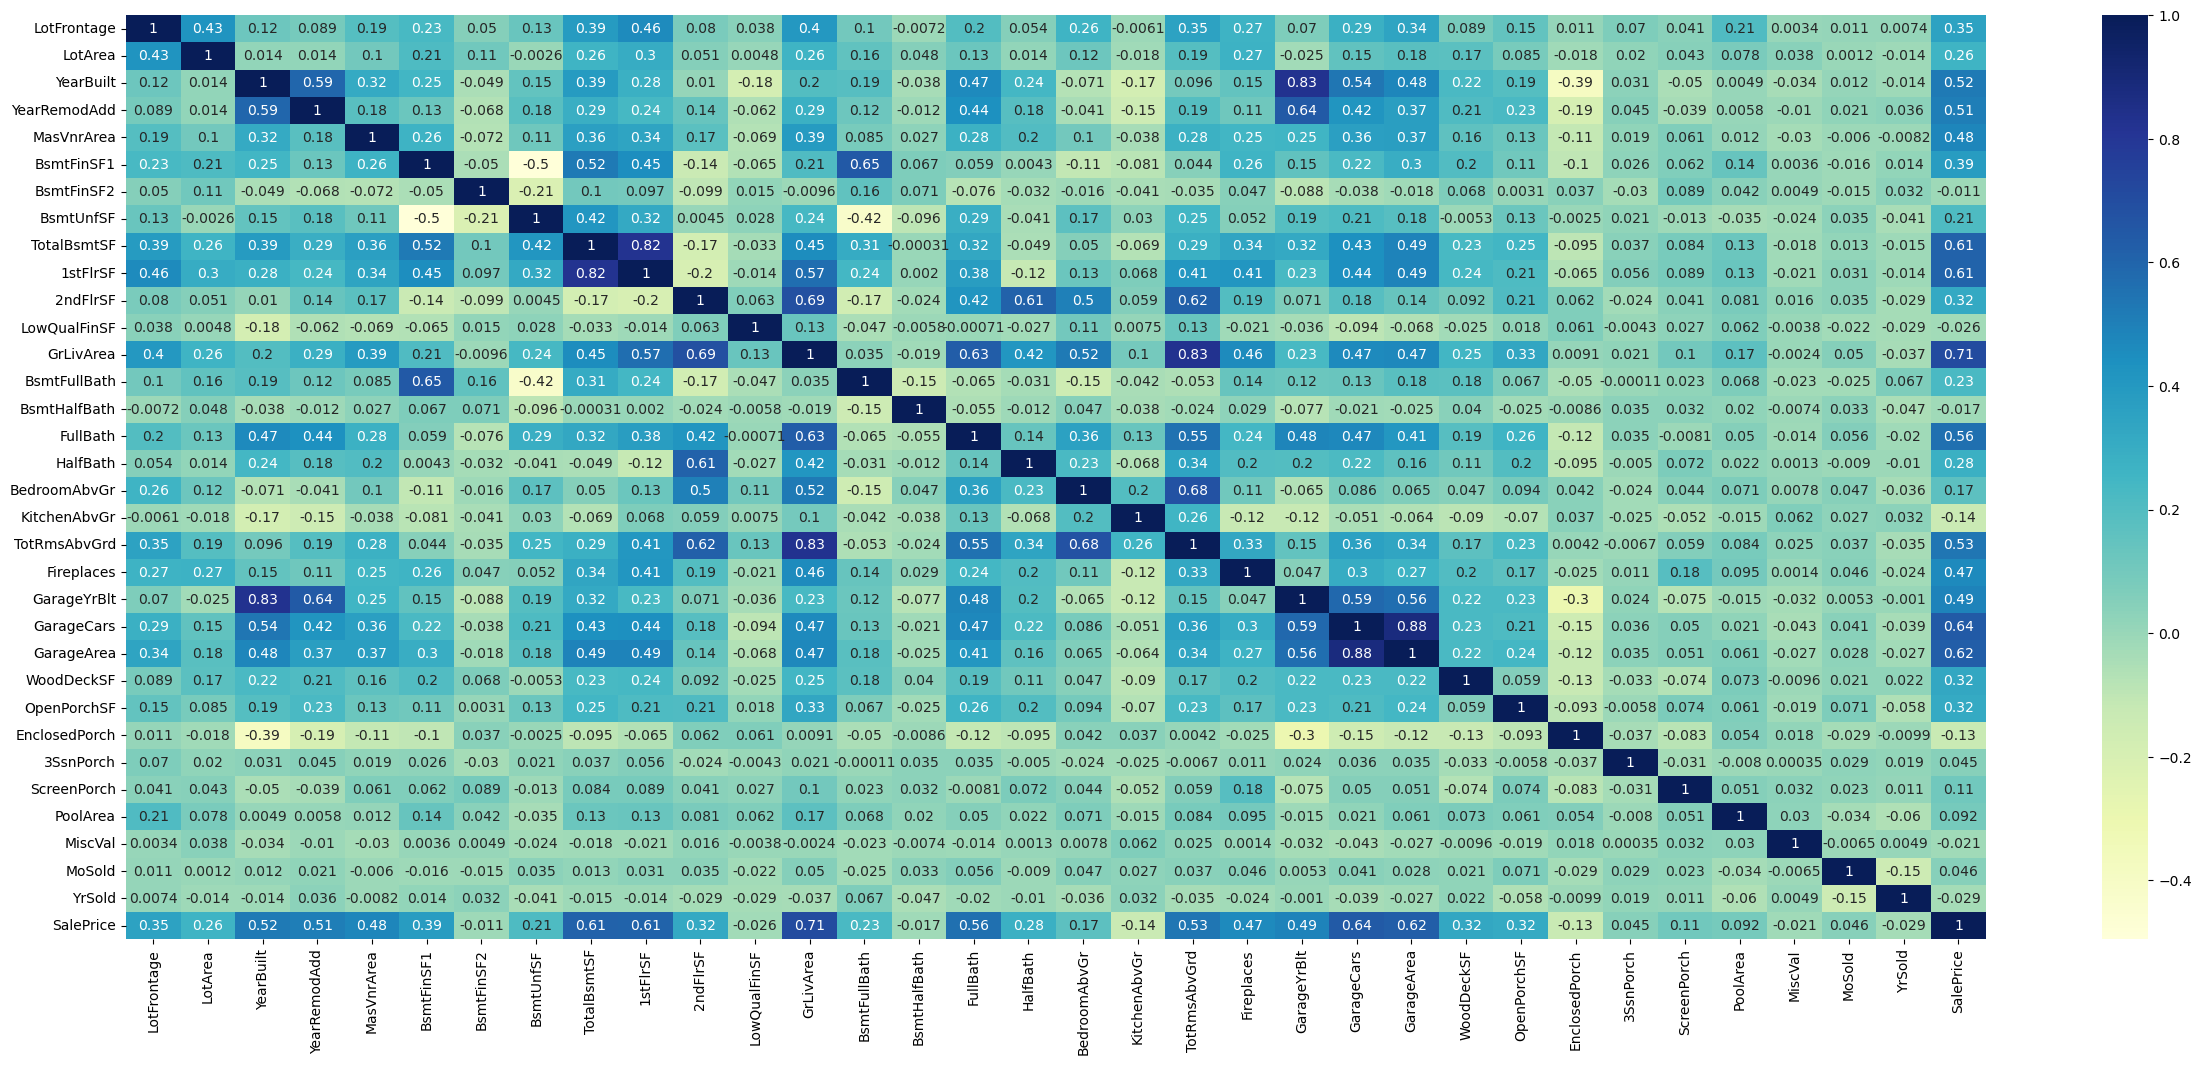

In [100]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:

Housing price  is highly (positively) correlated with GrLivArea, Garage area, year of building, year when it was rebuilt,Full bathrooms above grade, Total square feet of basement area notice how all of these variables represent the characteristics of the house).

Housing Price is negatively correlated to Kitchens above grade, Basement half bathrooms, LowQualFinSF and EnclosedPorch (-0.14 approximately). This suggest that houses having kitchen above grade, basement with half bathrooms, houses with low quality of finishing and with front covered may fall in housing with lower quality and are priced lower. 

Correlation among independent variables:

Some of independent variables are  correlated (look at the top-left part of matrix): , and are positively correlated or negatively correlated.

## 2. Data Cleaning
Let's now conduct some data cleaning steps.

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except symboling, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it can be used in the model as a numeric variable also.

In [101]:
# variable formats
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [102]:
# converting symboling to categorical
train['MSSubClass'] = train['MSSubClass'].astype('object')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [103]:
# converting symboling to categorical
train['OverallQual'] = train['OverallQual'].astype('object')
train['OverallCond'] = train['OverallCond'].astype('object')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [104]:
# outliers
train.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452  ...   
std     181.066207   456.098091   161.319273   441.866955   438.705324  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       0.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000  ...   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

## 3. Data Preparation
Data Preparation

Let's now prepare the data and build the model.

In [105]:
# split into X and y
X = train.loc[:,[ 'LotArea', 'Alley',  'OverallQual',
             'OverallCond', 'YearBuilt', 'RoofStyle',
             'MasVnrArea', 'ExterQual',  'TotalBsmtSF', 'Heating', 'CentralAir','FullBath',
                 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageArea',  'EnclosedPorch', 
                  'PoolArea',  'Fence',  'SaleType', 'SaleCondition']] # predictors in variable X

y = train['SalePrice'] # response variable in Y

In [106]:
# creating dummy variables for categorical variables

# subset all categorical variables
train_categorical = X.select_dtypes(include=['object'])
train_categorical.head()

Alley OverallQual OverallCond RoofStyle ExterQual Heating CentralAir  \
0   NaN           7           5     Gable        Gd    GasA          Y   
1   NaN           6           8     Gable        TA    GasA          Y   
2   NaN           7           5     Gable        Gd    GasA          Y   
3   NaN           7           5     Gable        TA    GasA          Y   
4   NaN           8           5     Gable        Gd    GasA          Y   

  KitchenQual Functional FireplaceQu Fence SaleType SaleCondition  
0          Gd        Typ         NaN   NaN       WD        Normal  
1          TA        Typ          TA   NaN       WD        Normal  
2          Gd        Typ          TA   NaN       WD        Normal  
3          Gd        Typ          Gd   NaN       WD       Abnorml  
4          Gd        Typ          TA   NaN       WD        Normal

In [107]:
# convert into dummies - one hot encoding
train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

Alley_Pave  OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
0           0              0              0              0              0   
1           0              0              0              0              0   
2           0              0              0              0              0   
3           0              0              0              0              0   
4           0              0              0              0              0   

   OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              1              0              0               0   
3              0              1              0              0               0   
4              0              0              1              0               0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 61 columns]

In [108]:
# drop categorical variables 
X = X.drop(list(train_categorical.columns), axis=1)

In [109]:
# concat dummy variables with X
X = pd.concat([X, train_dummies], axis=1)

In [110]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotArea', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'GarageArea', 'EnclosedPorch', 'PoolArea', 'Alley_Pave',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'CentralAir_Y',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2',
       'Functional_Min1', 'Functional_Min2', 'Functional_Mod',
       'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Fa', 'FireplaceQu_Gd',
       'FireplaceQu_Po', 'FireplaceQu_TA', '

In [111]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [112]:
# treating the missing values
X_train.describe()

LotArea    YearBuilt   MasVnrArea  TotalBsmtSF     FullBath  \
count  1021.000000  1021.000000  1017.000000  1021.000000  1021.000000   
mean     -0.003116    -0.000533     0.006715     0.009852     0.001894   
std       1.033207     1.005075     1.036412     1.046930     1.002294   
min      -0.905990    -3.287824    -0.572835    -2.411167    -2.841822   
25%      -0.307765    -0.571923    -0.572835    -0.602956    -1.026041   
50%      -0.101909     0.057371    -0.572835    -0.149193     0.789741   
75%       0.099738     0.951632     0.300075     0.585036     0.789741   
max      20.518273     1.282839     8.266757    11.520949     2.605522   

          HalfBath   GarageArea  EnclosedPorch     PoolArea   Alley_Pave  ...  \
count  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000  ...   
mean     -0.013477    -0.006694       0.022617    -0.015164    -0.033626  ...   
std       0.995727     0.995295       1.034473     0.859589     0.898640  ...   
min      -0.761621    -2.212963      -0.359325    -0.068692    -0.169981  ...   
25%      -0.761621    -0.678328      -0.359325    -0.068692    -0.169981  ...   
50%      -0.761621     0.032844      -0.359325    -0.068692    -0.169981  ...   
75%       1.227585     0.482006      -0.359325    -0.068692    -0.169981  ...   
max       3.216791     4.421526       8.675309    16.065342     5.883006  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1021.000000     1021.000000   1021.000000   1021.000000   
mean        -0.008325        0.008440     -0.018817      0.019511   
std          0.926953        1.069828      0.971565      1.195870   
min         -0.058621       -0.058621     -0.301962     -0.045376   
25%         -0.058621       -0.058621     -0.301962     -0.045376   
50%         -0.058621       -0.058621     -0.301962     -0.045376   
75%         -0.058621       -0.058621     -0.301962     -0.045376   
max         17.058722       17.058722      3.311678     22.037846   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1021.000000            1021.000000           1021.000000   
mean      0.008582               0.003799             -0.004250   
std       0.991085               1.036009              0.977045   
min      -2.562180              -0.052414             -0.091035   
25%       0.390293              -0.052414             -0.091035   
50%       0.390293              -0.052414             -0.091035   
75%       0.390293              -0.052414             -0.091035   
max       0.390293              19.078784             10.984838   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1021.000000           1021.000000            1021.000000  
mean               0.000115              0.013325              -0.025954  
std                1.000973              0.989201               0.960913  
min               -0.117851             -2.138345              -0.305995  
25%               -0.117851              0.467651              -0.305995  
50%               -0.117851              0.467651              -0.305995  
75%               -0.117851              0.467651              -0.305995  
max                8.485281              0.467651               3.268027  

[8 rows x 70 columns]

In [113]:
pd.set_option("display.max_rows",100)
X_train.isnull().sum()

LotArea                  0
YearBuilt                0
MasVnrArea               4
TotalBsmtSF              0
FullBath                 0
HalfBath                 0
GarageArea               0
EnclosedPorch            0
PoolArea                 0
Alley_Pave               0
OverallQual_2            0
OverallQual_3            0
OverallQual_4            0
OverallQual_5            0
OverallQual_6            0
OverallQual_7            0
OverallQual_8            0
OverallQual_9            0
OverallQual_10           0
OverallCond_2            0
OverallCond_3            0
OverallCond_4            0
OverallCond_5            0
OverallCond_6            0
OverallCond_7            0
OverallCond_8            0
OverallCond_9            0
RoofStyle_Gable          0
RoofStyle_Gambrel        0
RoofStyle_Hip            0
RoofStyle_Mansard        0
RoofStyle_Shed           0
ExterQual_Fa             0
ExterQual_Gd             0
ExterQual_TA             0
Heating_GasA             0
Heating_GasW             0
H

In [114]:
X_train.describe()

LotArea    YearBuilt   MasVnrArea  TotalBsmtSF     FullBath  \
count  1021.000000  1021.000000  1017.000000  1021.000000  1021.000000   
mean     -0.003116    -0.000533     0.006715     0.009852     0.001894   
std       1.033207     1.005075     1.036412     1.046930     1.002294   
min      -0.905990    -3.287824    -0.572835    -2.411167    -2.841822   
25%      -0.307765    -0.571923    -0.572835    -0.602956    -1.026041   
50%      -0.101909     0.057371    -0.572835    -0.149193     0.789741   
75%       0.099738     0.951632     0.300075     0.585036     0.789741   
max      20.518273     1.282839     8.266757    11.520949     2.605522   

          HalfBath   GarageArea  EnclosedPorch     PoolArea   Alley_Pave  ...  \
count  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000  ...   
mean     -0.013477    -0.006694       0.022617    -0.015164    -0.033626  ...   
std       0.995727     0.995295       1.034473     0.859589     0.898640  ...   
min      -0.761621    -2.212963      -0.359325    -0.068692    -0.169981  ...   
25%      -0.761621    -0.678328      -0.359325    -0.068692    -0.169981  ...   
50%      -0.761621     0.032844      -0.359325    -0.068692    -0.169981  ...   
75%       1.227585     0.482006      -0.359325    -0.068692    -0.169981  ...   
max       3.216791     4.421526       8.675309    16.065342     5.883006  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1021.000000     1021.000000   1021.000000   1021.000000   
mean        -0.008325        0.008440     -0.018817      0.019511   
std          0.926953        1.069828      0.971565      1.195870   
min         -0.058621       -0.058621     -0.301962     -0.045376   
25%         -0.058621       -0.058621     -0.301962     -0.045376   
50%         -0.058621       -0.058621     -0.301962     -0.045376   
75%         -0.058621       -0.058621     -0.301962     -0.045376   
max         17.058722       17.058722      3.311678     22.037846   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1021.000000            1021.000000           1021.000000   
mean      0.008582               0.003799             -0.004250   
std       0.991085               1.036009              0.977045   
min      -2.562180              -0.052414             -0.091035   
25%       0.390293              -0.052414             -0.091035   
50%       0.390293              -0.052414             -0.091035   
75%       0.390293              -0.052414             -0.091035   
max       0.390293              19.078784             10.984838   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1021.000000           1021.000000            1021.000000  
mean               0.000115              0.013325              -0.025954  
std                1.000973              0.989201               0.960913  
min               -0.117851             -2.138345              -0.305995  
25%               -0.117851              0.467651              -0.305995  
50%               -0.117851              0.467651              -0.305995  
75%               -0.117851              0.467651              -0.305995  
max                8.485281              0.467651               3.268027  

[8 rows x 70 columns]

In [115]:
pd.set_option("display.max_columns",300)
X_train.describe()

LotArea    YearBuilt   MasVnrArea  TotalBsmtSF     FullBath  \
count  1021.000000  1021.000000  1017.000000  1021.000000  1021.000000   
mean     -0.003116    -0.000533     0.006715     0.009852     0.001894   
std       1.033207     1.005075     1.036412     1.046930     1.002294   
min      -0.905990    -3.287824    -0.572835    -2.411167    -2.841822   
25%      -0.307765    -0.571923    -0.572835    -0.602956    -1.026041   
50%      -0.101909     0.057371    -0.572835    -0.149193     0.789741   
75%       0.099738     0.951632     0.300075     0.585036     0.789741   
max      20.518273     1.282839     8.266757    11.520949     2.605522   

          HalfBath   GarageArea  EnclosedPorch     PoolArea   Alley_Pave  \
count  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000   
mean     -0.013477    -0.006694       0.022617    -0.015164    -0.033626   
std       0.995727     0.995295       1.034473     0.859589     0.898640   
min      -0.761621    -2.212963      -0.359325    -0.068692    -0.169981   
25%      -0.761621    -0.678328      -0.359325    -0.068692    -0.169981   
50%      -0.761621     0.032844      -0.359325    -0.068692    -0.169981   
75%       1.227585     0.482006      -0.359325    -0.068692    -0.169981   
max       3.216791     4.421526       8.675309    16.065342     5.883006   

       OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean       -0.002118       0.016968       0.021293      -0.001383   
std         0.976903       1.069022       1.032867       0.999780   
min        -0.045376      -0.117851      -0.293785      -0.611123   
25%        -0.045376      -0.117851      -0.293785      -0.611123   
50%        -0.045376      -0.117851      -0.293785      -0.611123   
75%        -0.045376      -0.117851      -0.293785       1.636332   
max        22.037846       8.485281       3.403852       1.636332   

       OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean       -0.021414      -0.002563       0.016927      -0.017788   
std         0.988218       0.998738       1.020575       0.949502   
min        -0.586842      -0.528753      -0.360598      -0.174200   
25%        -0.586842      -0.528753      -0.360598      -0.174200   
50%        -0.586842      -0.528753      -0.360598      -0.174200   
75%        -0.586842      -0.528753      -0.360598      -0.174200   
max         1.704037       1.891244       2.773171       5.740513   

       OverallQual_10  OverallCond_2  OverallCond_3  OverallCond_4  \
count     1021.000000    1021.000000    1021.000000    1021.000000   
mean         0.012536      -0.008325      -0.026295      -0.009410   
std          1.054386       0.926953       0.896856       0.977782   
min         -0.111726      -0.058621      -0.131991      -0.201562   
25%         -0.111726      -0.058621      -0.131991      -0.201562   
50%         -0.111726      -0.058621      -0.131991      -0.201562   
75%         -0.111726      -0.058621      -0.131991      -0.201562   
max          8.950481      17.058722       7.576279       4.961253   

       OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean        0.015522      -0.023915       0.029998      -0.001586   
std         0.998416       0.979249       1.030650       0.997180   
min        -1.133499      -0.456738      -0.404162      -0.227757   
25%        -1.133499      -0.456738      -0.404162      -0.227757   
50%         0.882224      -0.456738      -0.404162      -0.227757   
75%         0.882224      -0.456738      -0.404162      -0.227757   
max         0.882224       2.189441       2.474258       4.390647   

       OverallCond_9  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
count    1021.000000      1021.000000        1021.000000    1021.000000   
mean       -

In [116]:
# since MasVnrArea have 4 missing values. it is less than 5 , we will replace it with Mean
X_train.fillna(X_train.mean(numeric_only=True).round(1), inplace=True)

## 3. Model Building and Evaluation

Linear Regression

Let's now try predicting house prices, a dataset using linear regression.

In [117]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [118]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

1400541574423329.2
[ 7.19000103e+03  5.10339049e+03  4.96154472e+03  1.20406469e+04
  1.22879558e+04  9.01557652e+03  8.23525726e+03  1.57027215e+03
 -2.69660452e+03 -1.68909468e+03  9.08617949e+14  2.33231471e+15
  5.42649662e+15  8.92797147e+15  8.75873974e+15  8.29142300e+15
  6.40290128e+15  3.39242349e+15  2.21416403e+15 -1.17221536e+15
 -2.60307609e+15 -3.88648657e+15 -9.95435021e+15 -7.58271347e+15
 -6.97091363e+15 -4.34462092e+15 -2.44445300e+15 -1.66281853e+04
 -1.67208608e+03 -1.40918501e+04 -2.21730473e+03 -8.85387042e+02
  1.79199465e+03  1.34525236e+04  1.00291725e+04 -1.11237438e+02
  2.19705513e+02 -4.99430945e+00 -8.18675201e+02  4.40412265e+02
  1.22040851e+03 -6.67998692e+03 -1.40213944e+04 -1.79615435e+04
  5.21407699e+02  3.39317307e+03  3.90433632e+03  1.60032840e+03
 -1.69815565e+03  6.32461950e+03  1.55518389e+03  4.48627940e+03
 -1.50426931e+02  5.45525061e+03  3.61737232e+02  1.21312858e+03
  1.90314058e+02  1.10909210e+03  2.31201090e+03  2.67994682e+03
 -2.99

In [119]:
from sklearn.metrics import r2_score, mean_squared_error

In [120]:
X_test.describe()

LotArea   YearBuilt  MasVnrArea  TotalBsmtSF    FullBath  \
count  438.000000  438.000000  434.000000   438.000000  438.000000   
mean     0.007400   -0.000628   -0.014415    -0.023276   -0.006218   
std      0.921514    0.990746    0.912069     0.884213    0.997331   
min     -0.923729   -3.188461   -0.572835    -2.411167   -2.841822   
25%     -0.277097   -0.571923   -0.572835    -0.557352   -1.026041   
50%     -0.113184    0.024251   -0.572835    -0.164015    0.789741   
75%      0.118580    0.984752    0.405045     0.435682    0.789741   
max     14.881285    1.249718    4.515455     3.344097    2.605522   

         HalfBath  GarageArea  EnclosedPorch    PoolArea  Alley_Pave  \
count  438.000000  438.000000     438.000000  438.000000  438.000000   
mean     0.028612    0.015796      -0.051900    0.035506    0.078772   
std      1.010977    1.014104       0.915956    1.270631    1.202965   
min     -0.761621   -2.212963      -0.359325   -0.068692   -0.169981   
25%     -0.761621   -0.640898      -0.359325   -0.068692   -0.169981   
50%     -0.761621   -0.011604      -0.359325   -0.068692   -0.169981   
75%      1.227585    0.482006      -0.359325   -0.068692   -0.169981   
max      3.216791    3.626136       4.845410   18.306180    5.883006   

       OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
count     438.000000     438.000000     438.000000     438.000000   
mean        0.005042      -0.039284      -0.048964       0.004618   
std         1.055177       0.819320       0.920465       1.003500   
min        -0.045376      -0.117851      -0.293785      -0.611123   
25%        -0.045376      -0.117851      -0.293785      -0.611123   
50%        -0.045376      -0.117851      -0.293785      -0.611123   
75%        -0.045376      -0.117851      -0.293785       1.636332   
max        22.037846       8.485281       3.403852       1.636332   

       OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  \
count     438.000000     438.000000     438.000000     438.000000   
mean        0.051257       0.001658      -0.038636       0.041862   
std         1.028130       1.002272       0.952559       1.110893   
min        -0.586842      -0.528753      -0.360598      -0.174200   
25%        -0.586842      -0.528753      -0.360598      -0.174200   
50%        -0.586842      -0.528753      -0.360598      -0.174200   
75%         1.704037      -0.528753      -0.360598      -0.174200   
max         1.704037       1.891244       2.773171       5.740513   

       OverallQual_10  OverallCond_2  OverallCond_3  OverallCond_4  \
count      438.000000     438.000000     438.000000     438.000000   
mean        -0.028966       0.019540       0.061596       0.022396   
std          0.863040       1.155359       1.207506       1.052913   
min         -0.111726      -0.058621      -0.131991      -0.201562   
25%         -0.111726      -0.058621      -0.131991      -0.201562   
50%         -0.111726      -0.058621      -0.131991      -0.201562   
75%         -0.111726      -0.058621      -0.131991      -0.201562   
max          8.950481      17.058722       7.576279       4.961253   

       OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  \
count     438.000000     438.000000     438.000000     438.000000   
mean       -0.038197       0.056790      -0.069003       0.004218   
std         1.005209       1.047703       0.924308       1.009885   
min        -1.133499      -0.456738      -0.404162      -0.227757   
25%        -1.133499      -0.456738      -0.404162      -0.227757   
50%         0.882224      -0.456738      -0.404162      -0.227757   
75%         0.882224      -0.456738      -0.404162      -0.227757   
max         0.882224       2.189441       2.474258       4.390647   

       OverallCond_9  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
count     438.000000       438.000000         438.000000     438.000000   
mean        0.063719        -0.079009           0.124093       0.058676   
std     

In [121]:
# since MasVnrArea have 4 missing values. it is less than 5 , we will replace it with Mean
X_test.fillna(X_train.mean(numeric_only=True).round(1), inplace=True)

In [122]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8119046885012542
-5.04348199777419e+23
1200179528267.3125
1.4216125903722372e+36
1175494151.0943315
3.245690845598715e+33


## Housing Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

1. Data Understanding and Exploration


Let's first have a look at the dataset and understand the size, attribute names etc.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [124]:
# reading the dataset
train = pd.read_csv("C:/Users/SHWETA/Dropbox/Upgrad course/Advanced regression/train.csv")

In [125]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [126]:
# head
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [127]:
train.shape

(1460, 81)

In [128]:
#summary statistics
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [129]:
#coutning on the missing values
pd.options.display.min_rows = 115
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Understanding the Data Dictionary


The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [130]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
train['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [131]:
# MSZoning: Identifies the general zoning classification of the sale.
train['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [132]:
# Street: Type of road access to property
train['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [133]:
#Alley: Type of alley access to property
train['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

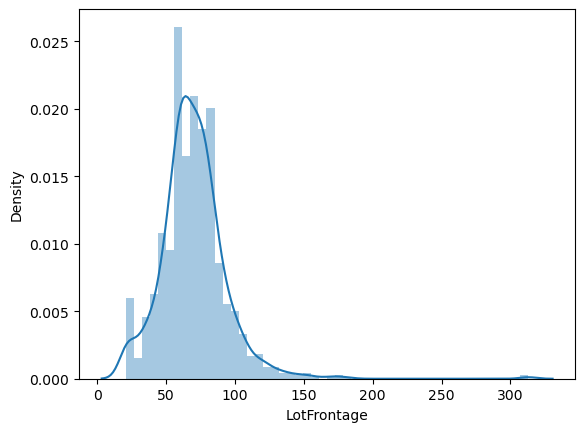

In [134]:
# LotFrontage: Linear feet of street connected to property
sns.distplot(train['LotFrontage'])
plt.show()

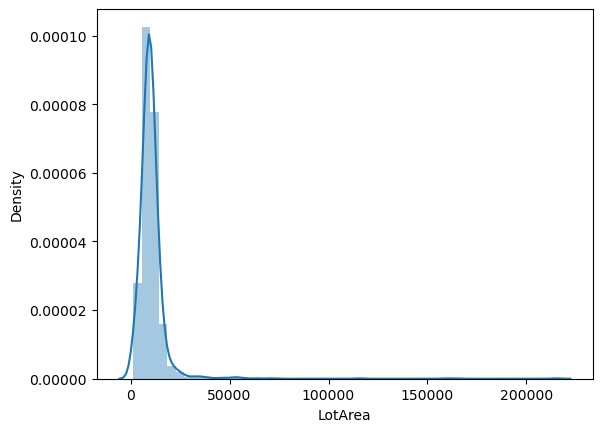

In [135]:
#LotArea: Lot size in square feet
sns.distplot(train['LotArea'])
plt.show()

In [136]:
#LotShape: General shape of property
train['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [137]:
#LandContour: Flatness of the property
train['LandContour'].astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [138]:
#Utilities: Type of utilities available
train['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [139]:
#LotConfig: Lot configuration
train['LotConfig'].astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [140]:
#LandSlope: Slope of property
train['LandSlope'].astype('category').value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [141]:
#Neighborhood: Physical locations within Ames city limits
train['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [142]:
#Condition1: Proximity to various conditions
train['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [143]:
#Condition2: Proximity to various conditions (if more than one is present)
train['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [144]:
#BldgType: Type of dwelling
train['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [145]:
#HouseStyle: Style of dwelling
train['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [146]:
#OverallQual: Rates the overall material and finish of the house
train['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [147]:
#OverallCond: Rates the overall condition of the house
train['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

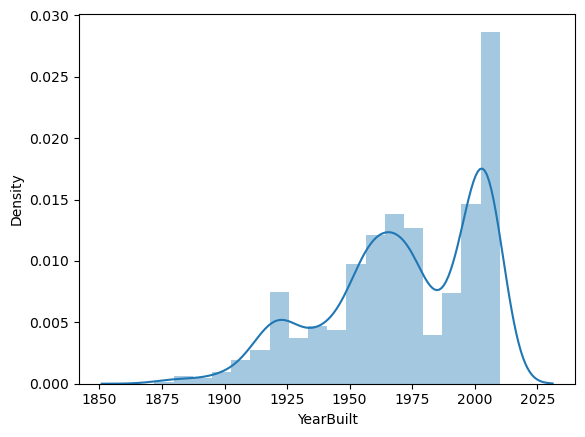

In [148]:
#YearBuilt: Original construction date
sns.distplot(train['YearBuilt'])
plt.show()

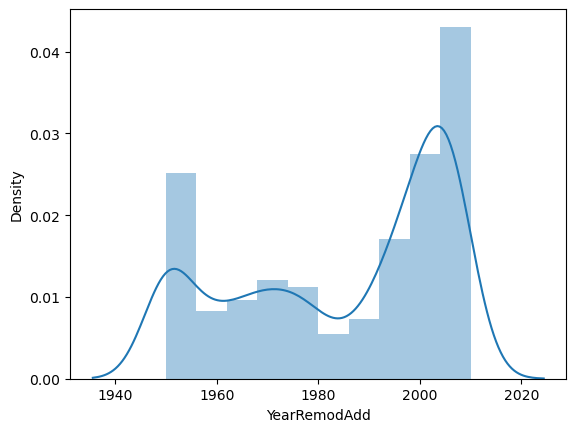

In [149]:
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
sns.distplot(train['YearRemodAdd'])
plt.show()

In [150]:
#RoofStyle: Type of roof
train['RoofStyle'].astype('category').value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [151]:
#RoofMatl: Roof material
train['RoofMatl'].astype('category').value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [152]:
#Exterior1st: Exterior covering on house
train['Exterior1st'].astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [153]:
#Exterior2nd: Exterior covering on house (if more than one material)
train['Exterior2nd'].astype('category').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [154]:
#MasVnrType: Masonry veneer type
train['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

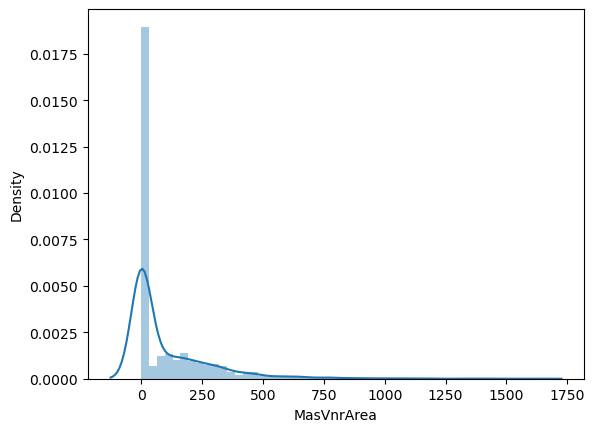

In [155]:
#MasVnrArea: Masonry veneer area in square feet
sns.distplot(train['MasVnrArea'])
plt.show()

In [156]:
#ExterQual: Evaluates the quality of the material on the exterior 
train['ExterQual'].astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [157]:
#ExterCond: Evaluates the present condition of the material on the exterior
train['ExterCond'].astype('category').value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [158]:
#Foundation: Type of foundation
train['Foundation'].astype('category').value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [159]:
#BsmtQual: Evaluates the height of the basement
train['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [160]:
#BsmtCond: Evaluates the general condition of the basement
train['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [161]:
#BsmtExposure: Refers to walkout or garden level walls
train['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [162]:
#BsmtFinType1: Rating of basement finished area
train['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

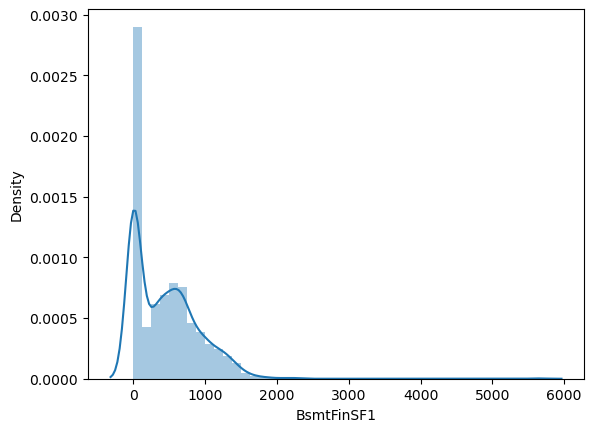

In [163]:
#BsmtFinSF1: Type 1 finished square feet
sns.distplot(train['BsmtFinSF1'])
plt.show()

In [164]:
#BsmtFinType2: Rating of basement finished area (if multiple types)
train['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

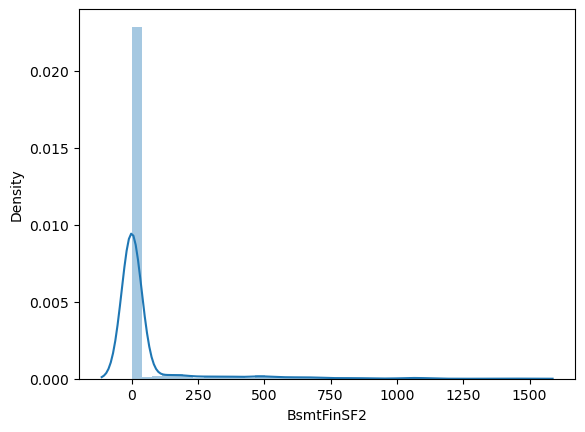

In [165]:
#BsmtFinSF2: Type 2 finished square feet
sns.distplot(train['BsmtFinSF2'])
plt.show()

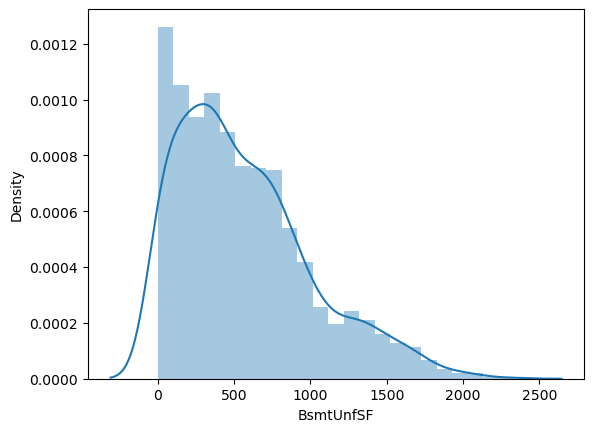

In [166]:
#BsmtUnfSF: Unfinished square feet of basement area
sns.distplot(train['BsmtUnfSF'])
plt.show()

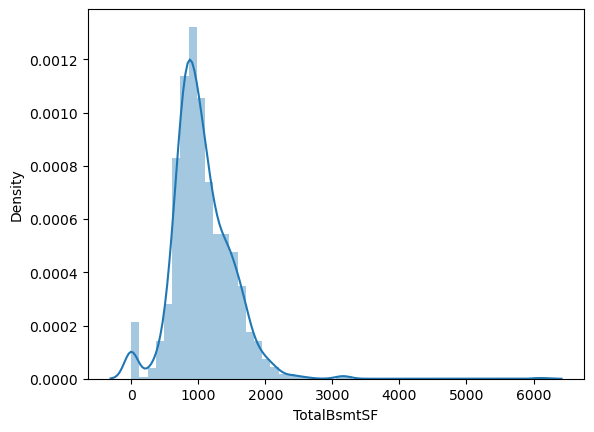

In [167]:
#TotalBsmtSF: Total square feet of basement area
sns.distplot(train['TotalBsmtSF'])
plt.show()

In [168]:
#Heating: Type of heating
train['Heating'].astype('category').value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [169]:
#HeatingQC: Heating quality and condition
train['HeatingQC'].astype('category').value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [170]:
#CentralAir: Central air conditioning
train['CentralAir'].astype('category').value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [171]:
#Electrical: Electrical system
train['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

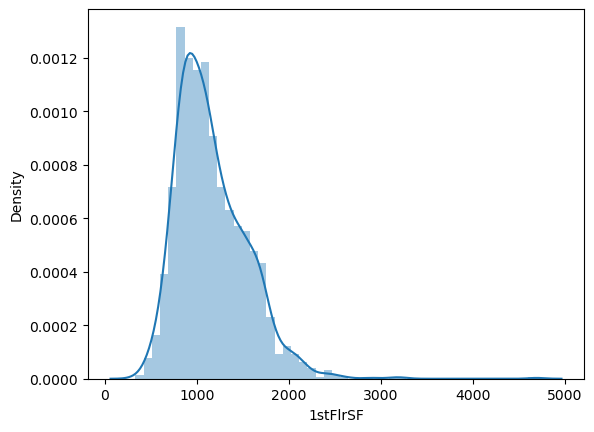

In [172]:
#1stFlrSF: First Floor square feet
sns.distplot(train['1stFlrSF'])
plt.show()

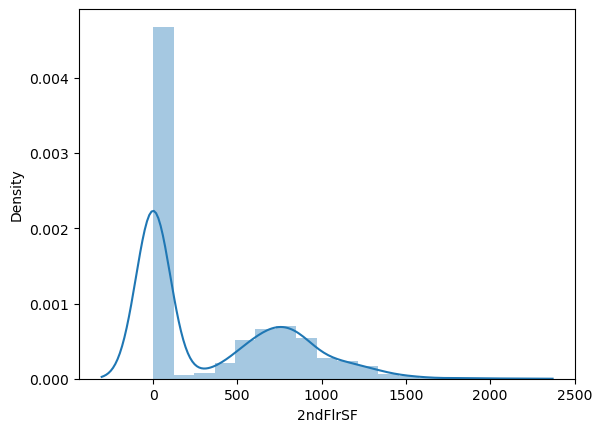

In [173]:
#2ndFlrSF: Second floor square feet
sns.distplot(train['2ndFlrSF'])
plt.show()

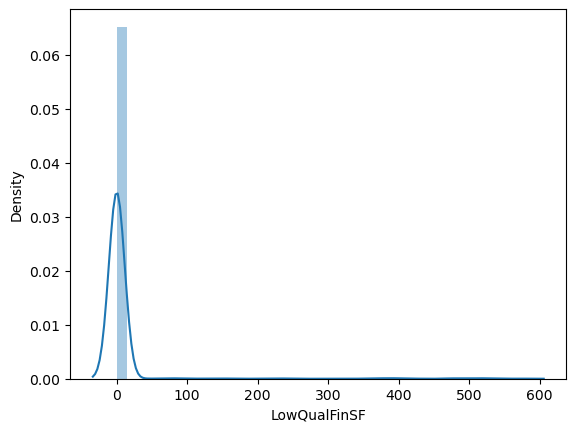

In [174]:
#LowQualFinSF: Low quality finished square feet (all floors)
sns.distplot(train['LowQualFinSF'])
plt.show()

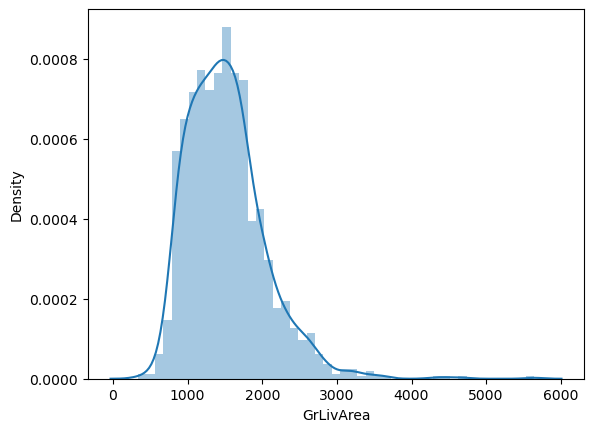

In [175]:
#GrLivArea: Above grade (ground) living area square feet
sns.distplot(train['GrLivArea'])
plt.show()

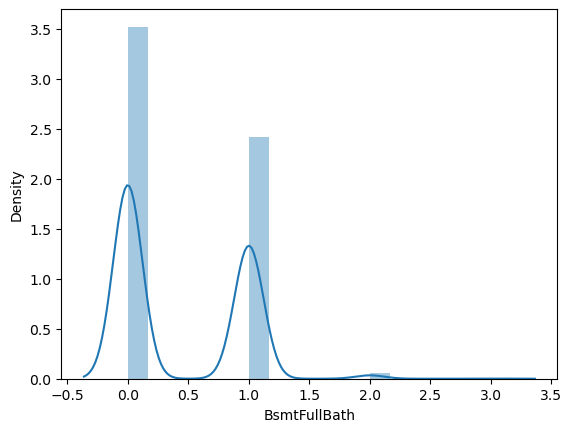

In [176]:
#BsmtFullBath: Basement full bathrooms
sns.distplot(train['BsmtFullBath'])
plt.show()

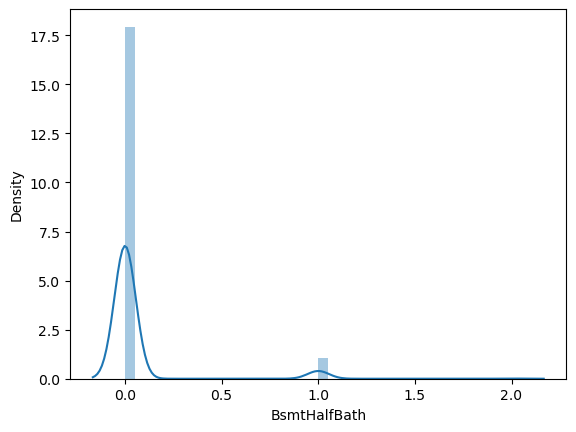

In [177]:
#BsmtHalfBath: Basement half bathrooms
sns.distplot(train['BsmtHalfBath'])
plt.show()

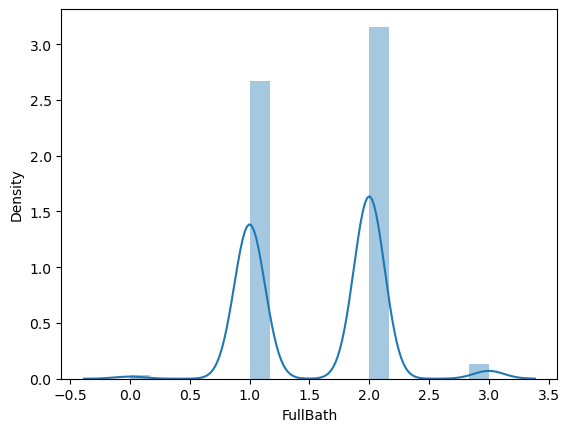

In [178]:
#FullBath: Full bathrooms above grade
sns.distplot(train['FullBath'])
plt.show()

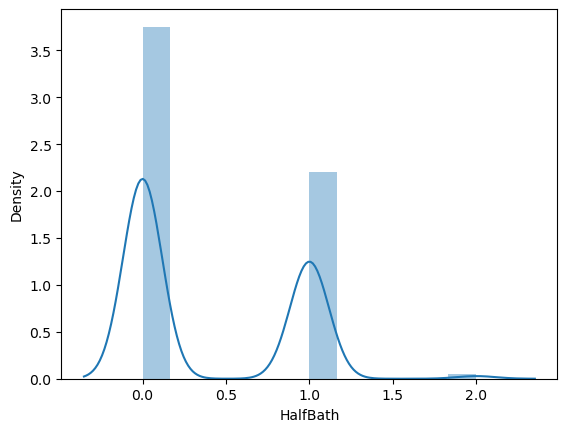

In [179]:
#HalfBath: Half baths above grade
sns.distplot(train['HalfBath'])
plt.show()

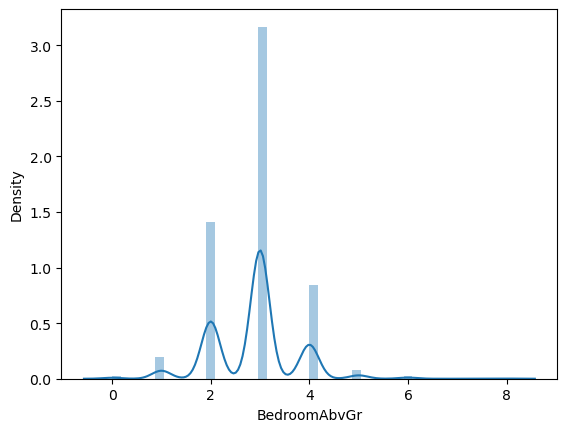

In [180]:
#BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
sns.distplot(train['BedroomAbvGr'])
plt.show()


In [181]:
train['BedroomAbvGr'].astype('category').value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [182]:
train['FullBath'].astype('category').value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [183]:
train['HalfBath'].astype('category').value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [184]:
train['BsmtHalfBath'].astype('category').value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [185]:
train['BsmtFullBath'].astype('category').value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

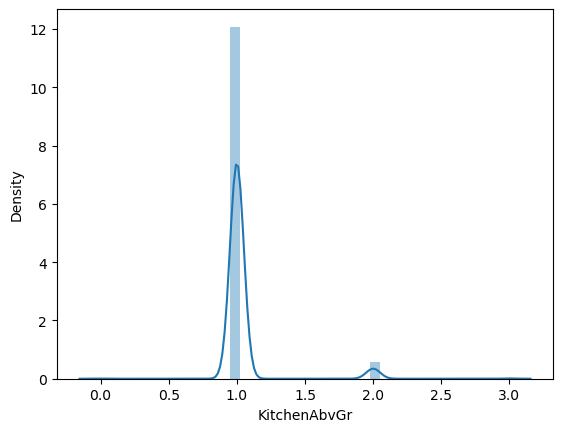

In [186]:
#KitchenAbvGr: Kitchens above grade
sns.distplot(train['KitchenAbvGr'])
plt.show()

In [187]:
##KitchenAbvGr: Kitchens above grade
train['KitchenAbvGr'].astype('category').value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [188]:
#KitchenQual: Kitchen quality
train['KitchenQual'].astype('category').value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

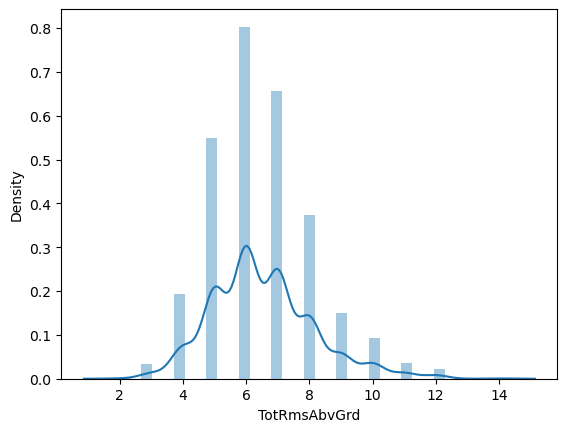

In [189]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
sns.distplot(train['TotRmsAbvGrd'])
plt.show()

In [190]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
train['TotRmsAbvGrd'].astype('category').value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [191]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
train['Functional'].astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

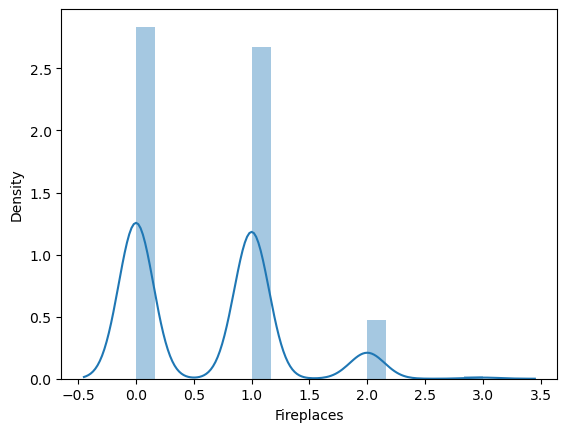

In [192]:
#Fireplaces: Number of fireplaces
sns.distplot(train['Fireplaces'])
plt.show()

In [193]:
#FireplaceQu: Fireplace quality
train['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [194]:
#GarageType: Garage location
train['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

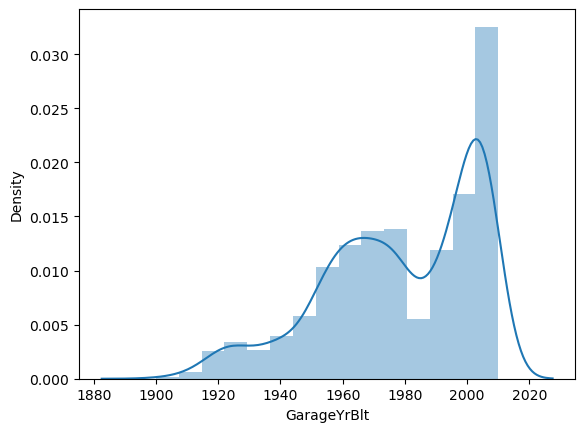

In [195]:
#GarageYrBlt: Year garage was built
sns.distplot(train['GarageYrBlt'])
plt.show()

In [196]:
#GarageFinish: Interior finish of the garage
train['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

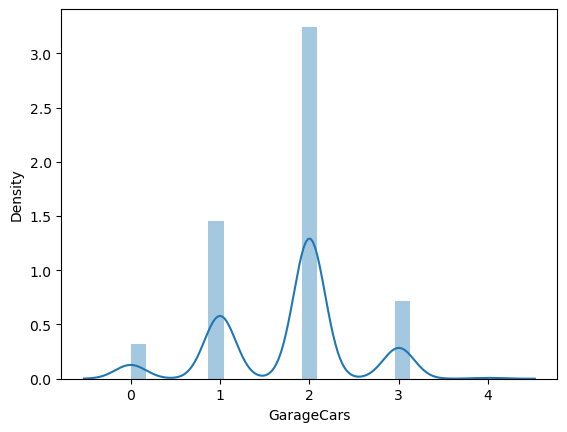

In [197]:
#GarageCars: Size of garage in car capacity
sns.distplot(train['GarageCars'])
plt.show()

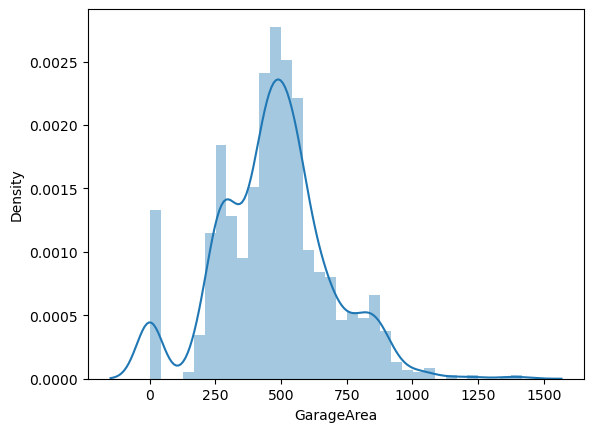

In [198]:
#GarageArea: Size of garage in square feet
sns.distplot(train['GarageArea'])
plt.show()

In [199]:
#GarageQual: Garage quality
train['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [200]:
#GarageCond: Garage condition
train['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [201]:
#PavedDrive: Paved driveway
train['PavedDrive'].astype('category').value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

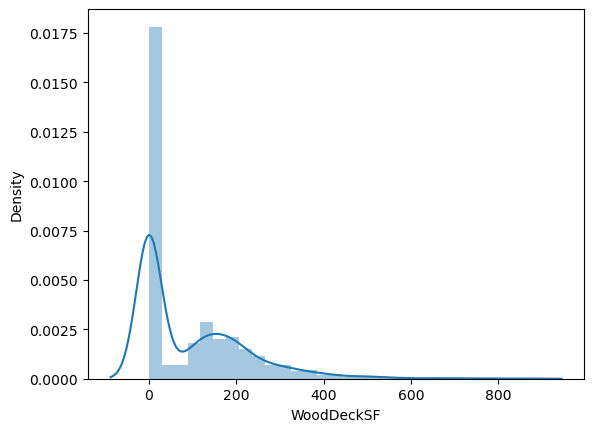

In [202]:
#WoodDeckSF: Wood deck area in square feet
sns.distplot(train['WoodDeckSF'])
plt.show()

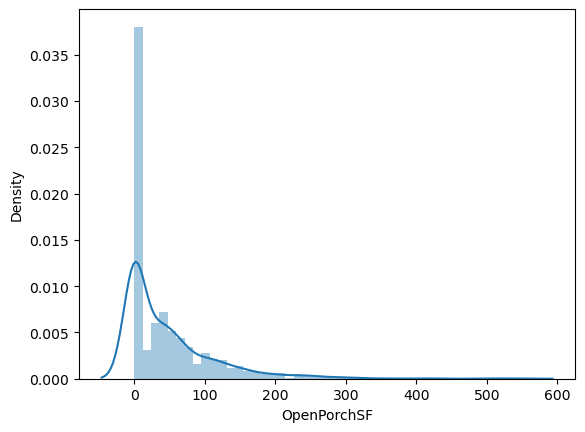

In [203]:
#OpenPorchSF: Open porch area in square feet
sns.distplot(train['OpenPorchSF'])
plt.show()

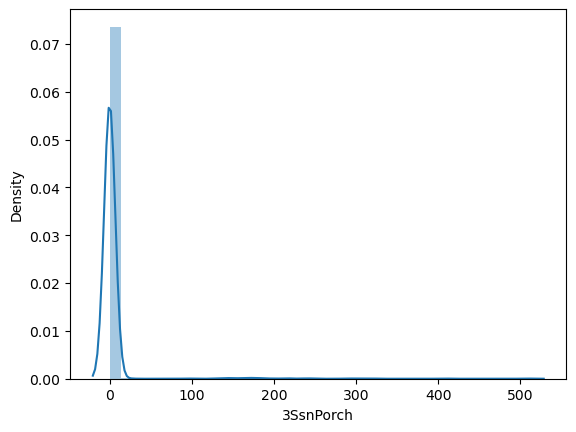

In [204]:
#3SsnPorch: Three season porch area in square feet
sns.distplot(train['3SsnPorch'])
plt.show()

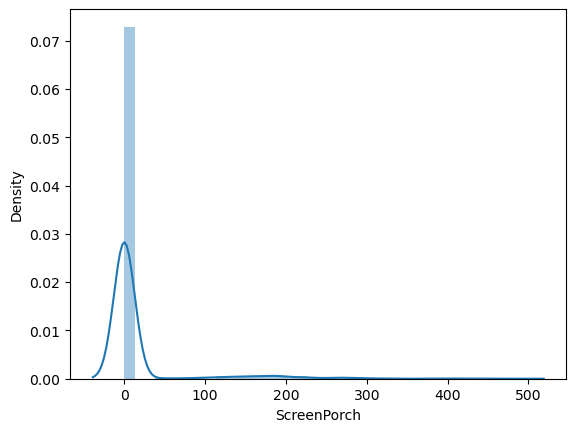

In [205]:
#ScreenPorch: Screen porch area in square feet
sns.distplot(train['ScreenPorch'])
plt.show()

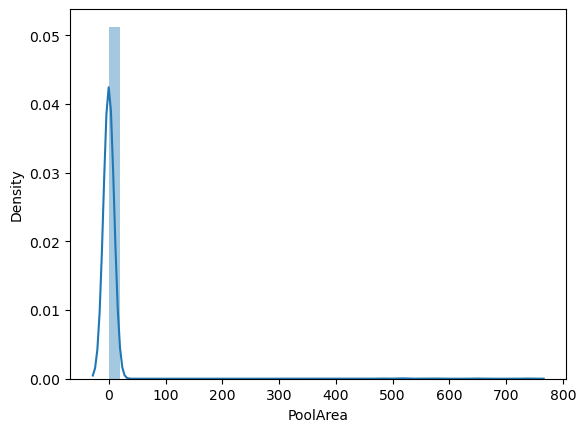

In [206]:
#PoolArea: Pool area in square feet
sns.distplot(train['PoolArea'])
plt.show()

In [207]:
#PoolQC: Pool quality
train['PoolQC'].astype('category').value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [208]:
#Fence: Fence quality
train['Fence'].astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [209]:
#MiscFeature: Miscellaneous feature not covered in other categories
train['MiscFeature'].astype('category').value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

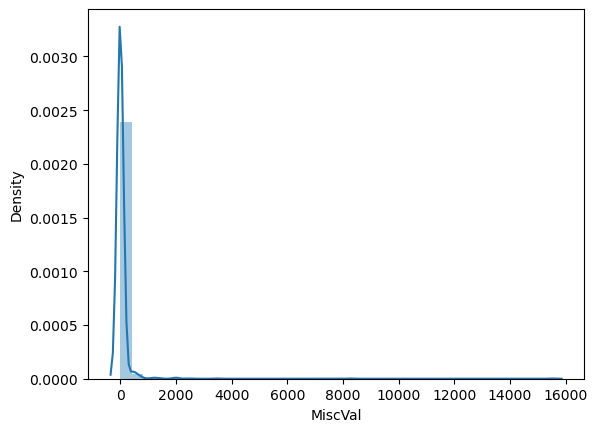

In [210]:
#MiscVal: $Value of miscellaneous feature
sns.distplot(train['MiscVal'])
plt.show()

In [211]:
#MoSold: Month Sold (MM)
train['MoSold'].astype('category').value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

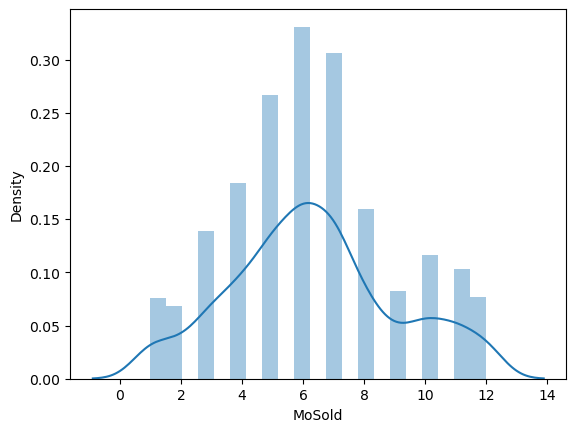

In [212]:
#MoSold: Month Sold (MM)
sns.distplot(train['MoSold'])
plt.show()

In [213]:
#YrSold: Year Sold (YYYY)
train['YrSold'].astype('category').value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

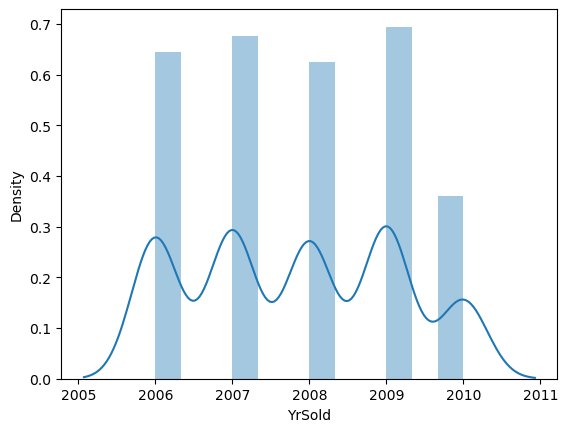

In [214]:
#YrSold: Year Sold (YYYY)
sns.distplot(train['YrSold'])
plt.show()

In [215]:
#SaleType: Type of sale
train['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [216]:
#SaleCondition: Condition of sale
train['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

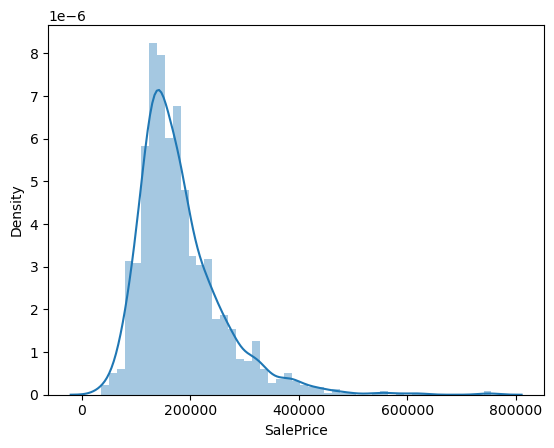

In [217]:
#SalePrice:sale price of house
sns.distplot(train['SalePrice'])
plt.show()

In [218]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [219]:
# all numeric (float and int) variables in the dataset
train_numeric = train.select_dtypes(include=['float64', 'int64'])
train_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Here, although the variable MSSubClass,OverallQual,OverallCond is numeric (int), we'd rather treat it as categorical since it has only 6 discrete values. Also, we do not want 'ID'.

In [220]:
# all numeric (float and int) variables in the dataset
train_numeric = train_numeric.drop(['MSSubClass','OverallQual','OverallCond','Id'], axis=1)
train_numeric.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000

In [221]:
# correlation matrix
cor = train_numeric.corr()
cor

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage       1.000000  0.426095   0.123349      0.088866    0.193458   
LotArea           0.426095  1.000000   0.014228      0.013788    0.104160   
YearBuilt         0.123349  0.014228   1.000000      0.592855    0.315707   
YearRemodAdd      0.088866  0.013788   0.592855      1.000000    0.179618   
MasVnrArea        0.193458  0.104160   0.315707      0.179618    1.000000   
BsmtFinSF1        0.233633  0.214103   0.249503      0.128451    0.264736   
BsmtFinSF2        0.049900  0.111170  -0.049107     -0.067759   -0.072319   
BsmtUnfSF         0.132644 -0.002618   0.149040      0.181133    0.114442   
TotalBsmtSF       0.392075  0.260833   0.391452      0.291066    0.363936   
1stFlrSF          0.457181  0.299475   0.281986      0.240379    0.344501   
2ndFlrSF          0.080177  0.050986   0.010308      0.140024    0.174561   
LowQualFinSF      0.038469  0.004779  -0.183784     -0.062419   -0.069071   
GrLivArea         0.402797  0.263116   0.199010      0.287389    0.390857   
BsmtFullBath      0.100949  0.158155   0.187599      0.119470    0.085310   
BsmtHalfBath     -0.007234  0.048046  -0.038162     -0.012337    0.026673   
FullBath          0.198769  0.126031   0.468271      0.439046    0.276833   
HalfBath          0.053532  0.014259   0.242656      0.183331    0.201444   
BedroomAbvGr      0.263170  0.119690  -0.070651     -0.040581    0.102821   
KitchenAbvGr     -0.006069 -0.017784  -0.174800     -0.149598   -0.037610   
TotRmsAbvGrd      0.352096  0.190015   0.095589      0.191740    0.280682   
Fireplaces        0.266639  0.271364   0.147716      0.112581    0.249070   
GarageYrBlt       0.070250 -0.024947   0.825667      0.642277    0.252691   
GarageCars        0.285691  0.154871   0.537850      0.420622    0.364204   
GarageArea        0.344997  0.180403   0.478954      0.371600    0.373066   
WoodDeckSF        0.088521  0.171698   0.224880      0.205726    0.159718   
OpenPorchSF       0.151972  0.084774   0.188686      0.226298    0.125703   
EnclosedPorch     0.010700 -0.018340  -0.387268     -0.193919   -0.110204   
3SsnPorch         0.070029  0.020423   0.031355      0.045286    0.018796   
ScreenPorch       0.041383  0.043160  -0.050364     -0.038740    0.061466   
PoolArea          0.206167  0.077672   0.004950      0.005829    0.011723   
MiscVal           0.003368  0.038068  -0.034383     -0.010286   -0.029815   
MoSold            0.011200  0.001205   0.012398      0.021490   -0.005965   
YrSold            0.007450 -0.014261  -0.013618      0.035743   -0.008201   
SalePrice         0.351799  0.263843   0.522897      0.507101    0.477493   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
LotFrontage      0.233633    0.049900   0.132644     0.392075  0.457181   
LotArea          0.214103    0.111170  -0.002618     0.260833  0.299475   
YearBuilt        0.249503   -0.049107   0.149040     0.391452  0.281986   
YearRemodAdd     0.128451   -0.067759   0.181133     0.291066  0.240379   
MasVnrArea       0.264736   -0.072319   0.114442     0.363936  0.344501   
BsmtFinSF1       1.000000   -0.050117  -0.495251     0.522396  0.445863   
BsmtFinSF2      -0.050117    1.000000  -0.209294     0.104810  0.097117   
BsmtUnfSF       -0.495251   -0.209294   1.000000     0.415360  0.317987   
TotalBsmtSF      0.522396    0.104810   0.415360     1.000000  0.819530   
1stFlrSF         0.445863    0.097117   0.317987     0.819530  1.000000   
2ndFlrSF        -0.137079   -0.099260   0.004469    -0.174512 -0.202646   
LowQualFinSF    -0.064503    0.014807   0.028167    -0.033245 -0.014241   
GrLivArea        0.208171   -0.009640   0.240257     0.454868  0.566024   
BsmtFullBath     0.649212    0.158678  -0.422900     0.307351  0.244671   
BsmtHalfBath     0.067418    0.070948  -0.095804    -0.000315  0.001956   
FullBath         0.058543   -0.076444   0.288886     0.323722  0.380637   
HalfBath         0.004262   -0.032148  -0.04

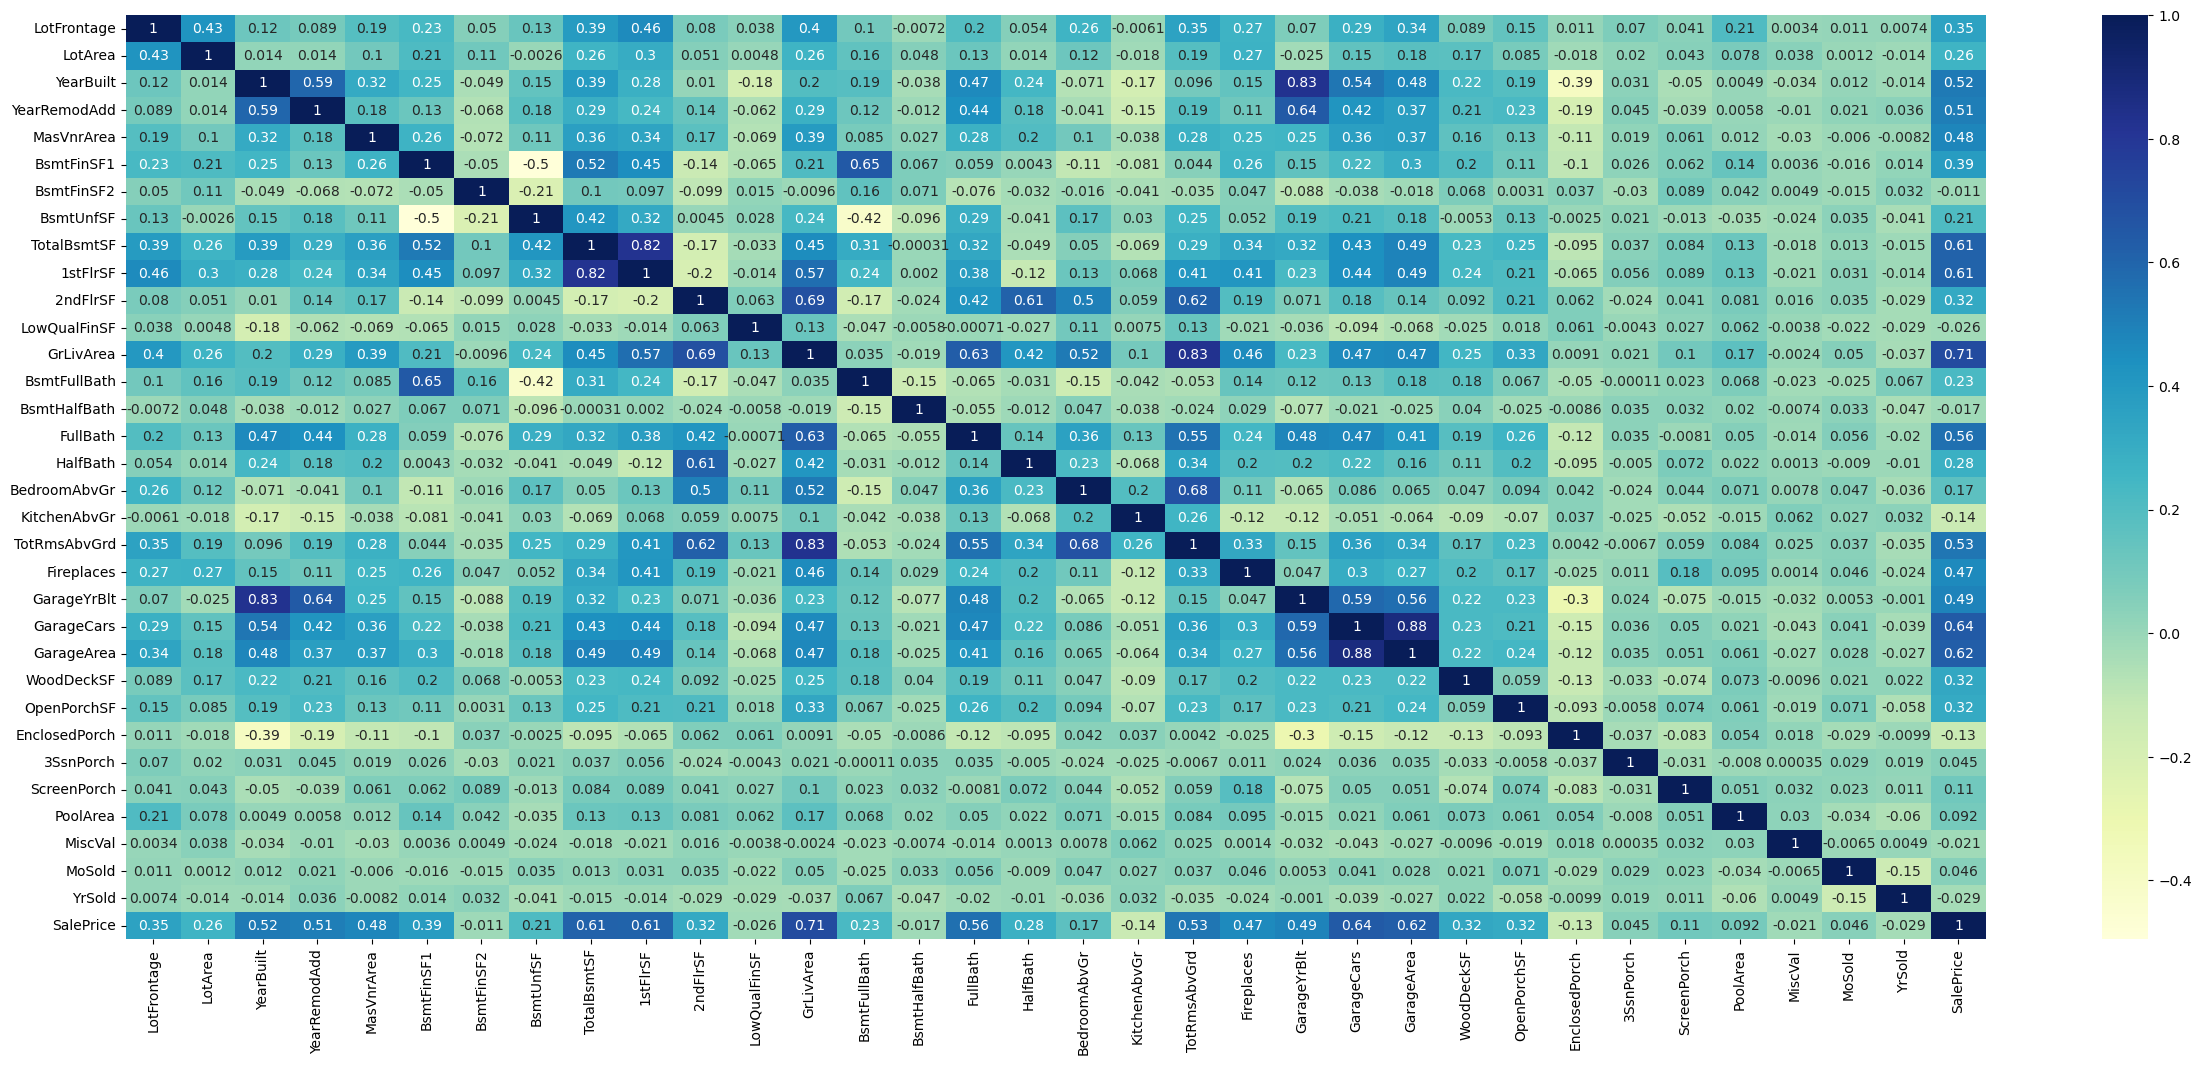

In [222]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:

Housing price  is highly (positively) correlated with , notice how all of these variables represent the size/weight/engine power of the car)

Housing Price is negatively correlated to ,Bedrooom above grade,  and EnclosedPorch (-0.14 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:

Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated
Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning
Let's now conduct some data cleaning steps.

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except symboling, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it can be used in the model as a numeric variable also.

In [223]:
# variable formats
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [224]:
# converting symboling to categorical
train['MSSubClass'] = train['MSSubClass'].astype('object')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [225]:
# converting symboling to categorical
train['OverallQual'] = train['OverallQual'].astype('object')
train['OverallCond'] = train['OverallCond'].astype('object')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [226]:
# outliers
train.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000   
mean       6.517808     0.613014  1978.506164     1.767123   472.980137   
std        1.625393     0.644666    24.689725     0.747315   213.804841   
min        2.000000     0.000000  1900.000000     0.000000     0.000000   
25%        5.000000     0.000000  1961.000000     1.000000   334.500000   
50%        6.000000     1.000000  1980.000000     2.000000   480.000000   
75%        7.000000     1.000000  2002.000000     2.000000   576.000000   
max       14.000000     3.000000  2010.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.00

# 3. Data Preparation

Data Preparation

Let's now prepare the data and build the model.

In [227]:
# split into X and y
X = train.loc[:,[ 'LotArea', 'Alley',  'OverallQual',
              'YearBuilt', 'RoofStyle',
             'MasVnrArea', 'ExterQual',  'TotalBsmtSF', 'Heating', 'CentralAir','FullBath',
                  'GarageArea',  'EnclosedPorch', 
                  'PoolArea',  'Fence',  'SaleType', 'SaleCondition']] # predictors in variable X

y = train['SalePrice'] # response variable in Y

In [228]:
# creating dummy variables for categorical variables

# subset all categorical variables
train_categorical = X.select_dtypes(include=['object'])
train_categorical.head()

Alley OverallQual RoofStyle ExterQual Heating CentralAir Fence SaleType  \
0   NaN           7     Gable        Gd    GasA          Y   NaN       WD   
1   NaN           6     Gable        TA    GasA          Y   NaN       WD   
2   NaN           7     Gable        Gd    GasA          Y   NaN       WD   
3   NaN           7     Gable        TA    GasA          Y   NaN       WD   
4   NaN           8     Gable        Gd    GasA          Y   NaN       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [229]:
# convert into dummies - one hot encoding
train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

Alley_Pave  OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
0           0              0              0              0              0   
1           0              0              0              0              0   
2           0              0              0              0              0   
3           0              0              0              0              0   
4           0              0              0              0              0   

   OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              1              0              0               0   
3              0              1              0              0               0   
4              0              0              1              0               0   

   RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                1                  0              0                  0   
2                1                  0              0                  0   
3                1                  0              0                  0   
4                1                  0              0                  0   

   RoofStyle_Shed  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  Heating_GasA  \
0               0             0             1             0             1   
1               0             0             0             1             1   
2               0             0             1             0             1   
3               0             0             0             1             1   
4               0             0             1             0             1   

   Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  CentralAir_Y  \
0             0             0             0             0             1   
1             0             0             0             0             1   
2             0             0             0             0             1   
3             0             0             0             0             1   
4             0             0             0             0             1   

   Fence_GdWo  Fence_MnPrv  Fence_MnWw  SaleType_CWD  SaleType_Con  \
0           0            0           0             0             0   
1           0            0           0             0             0   
2           0            0           0             0             0   
3           0            0           0             0             0   
4           0            0           0             0             0   

   SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0               0               0               0             0             0   
1               0               0               0             0             0   
2               0               0               0             0             0   
3               0               0               0             0             0   
4               0               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1 

In [230]:
# drop categorical variables 
X = X.drop(list(train_categorical.columns), axis=1)

In [231]:
# concat dummy variables with X
X = pd.concat([X, train_dummies], axis=1)

In [232]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotArea', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'FullBath',
       'GarageArea', 'EnclosedPorch', 'PoolArea', 'Alley_Pave',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'CentralAir_Y',
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [233]:
# treating the missing values
X_train.describe()

LotArea    YearBuilt   MasVnrArea  TotalBsmtSF     FullBath  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean     -0.003116    -0.000533     0.006689     0.009852     0.001894   
std       1.033207     1.005075     1.034378     1.046930     1.002294   
min      -0.905990    -3.287824    -0.572835    -2.411167    -2.841822   
25%      -0.307765    -0.571923    -0.572835    -0.602956    -1.026041   
50%      -0.101909     0.057371    -0.572835    -0.149193     0.789741   
75%       0.099738     0.951632     0.300075     0.585036     0.789741   
max      20.518273     1.282839     8.266757    11.520949     2.605522   

          HalfBath   GarageArea  EnclosedPorch     PoolArea   Alley_Pave  \
count  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000   
mean     -0.013477    -0.006694       0.022617    -0.015164    -0.033626   
std       0.995727     0.995295       1.034473     0.859589     0.898640   
min      -0.761621    -2.212963      -0.359325    -0.068692    -0.169981   
25%      -0.761621    -0.678328      -0.359325    -0.068692    -0.169981   
50%      -0.761621     0.032844      -0.359325    -0.068692    -0.169981   
75%       1.227585     0.482006      -0.359325    -0.068692    -0.169981   
max       3.216791     4.421526       8.675309    16.065342     5.883006   

       OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean       -0.002118       0.016968       0.021293      -0.001383   
std         0.976903       1.069022       1.032867       0.999780   
min        -0.045376      -0.117851      -0.293785      -0.611123   
25%        -0.045376      -0.117851      -0.293785      -0.611123   
50%        -0.045376      -0.117851      -0.293785      -0.611123   
75%        -0.045376      -0.117851      -0.293785       1.636332   
max        22.037846       8.485281       3.403852       1.636332   

       OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean       -0.021414      -0.002563       0.016927      -0.017788   
std         0.988218       0.998738       1.020575       0.949502   
min        -0.586842      -0.528753      -0.360598      -0.174200   
25%        -0.586842      -0.528753      -0.360598      -0.174200   
50%        -0.586842      -0.528753      -0.360598      -0.174200   
75%        -0.586842      -0.528753      -0.360598      -0.174200   
max         1.704037       1.891244       2.773171       5.740513   

       OverallQual_10  OverallCond_2  OverallCond_3  OverallCond_4  \
count     1021.000000    1021.000000    1021.000000    1021.000000   
mean         0.012536      -0.008325      -0.026295      -0.009410   
std          1.054386       0.926953       0.896856       0.977782   
min         -0.111726      -0.058621      -0.131991      -0.201562   
25%         -0.111726      -0.058621      -0.131991      -0.201562   
50%         -0.111726      -0.058621      -0.131991      -0.201562   
75%         -0.111726      -0.058621      -0.131991      -0.201562   
max          8.950481      17.058722       7.576279       4.961253   

       OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean        0.015522      -0.023915       0.029998      -0.001586   
std         0.998416       0.979249       1.030650       0.997180   
min        -1.133499      -0.456738      -0.404162      -0.227757   
25%        -1.133499      -0.456738      -0.404162      -0.227757   
50%         0.882224      -0.456738      -0.404162      -0.227757   
75%         0.882224      -0.456738      -0.404162      -0.227757   
max         0.882224       2.189441       2.474258       4.390647   

       OverallCond_9  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
count    1021.000000      1021.000000        1021.000000    1021.000000   
mean       -

In [234]:
pd.set_option("display.max_rows",100)
X_train.isnull().sum()

LotArea                  0
YearBuilt                0
MasVnrArea               0
TotalBsmtSF              0
FullBath                 0
HalfBath                 0
GarageArea               0
EnclosedPorch            0
PoolArea                 0
Alley_Pave               0
OverallQual_2            0
OverallQual_3            0
OverallQual_4            0
OverallQual_5            0
OverallQual_6            0
OverallQual_7            0
OverallQual_8            0
OverallQual_9            0
OverallQual_10           0
OverallCond_2            0
OverallCond_3            0
OverallCond_4            0
OverallCond_5            0
OverallCond_6            0
OverallCond_7            0
OverallCond_8            0
OverallCond_9            0
RoofStyle_Gable          0
RoofStyle_Gambrel        0
RoofStyle_Hip            0
RoofStyle_Mansard        0
RoofStyle_Shed           0
ExterQual_Fa             0
ExterQual_Gd             0
ExterQual_TA             0
Heating_GasA             0
Heating_GasW             0
H

In [235]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [236]:
pd.set_option("display.max_columns",300)
X_train.describe()

LotArea    YearBuilt   MasVnrArea  TotalBsmtSF     FullBath  \
count  1021.000000  1021.000000  1017.000000  1021.000000  1021.000000   
mean     -0.003116    -0.000533     0.006715     0.009852     0.001894   
std       1.033207     1.005075     1.036412     1.046930     1.002294   
min      -0.905990    -3.287824    -0.572835    -2.411167    -2.841822   
25%      -0.307765    -0.571923    -0.572835    -0.602956    -1.026041   
50%      -0.101909     0.057371    -0.572835    -0.149193     0.789741   
75%       0.099738     0.951632     0.300075     0.585036     0.789741   
max      20.518273     1.282839     8.266757    11.520949     2.605522   

        GarageArea  EnclosedPorch     PoolArea   Alley_Pave  OverallQual_2  \
count  1021.000000    1021.000000  1021.000000  1021.000000    1021.000000   
mean     -0.006694       0.022617    -0.015164    -0.033626      -0.002118   
std       0.995295       1.034473     0.859589     0.898640       0.976903   
min      -2.212963      -0.359325    -0.068692    -0.169981      -0.045376   
25%      -0.678328      -0.359325    -0.068692    -0.169981      -0.045376   
50%       0.032844      -0.359325    -0.068692    -0.169981      -0.045376   
75%       0.482006      -0.359325    -0.068692    -0.169981      -0.045376   
max       4.421526       8.675309    16.065342     5.883006      22.037846   

       OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean        0.016968       0.021293      -0.001383      -0.021414   
std         1.069022       1.032867       0.999780       0.988218   
min        -0.117851      -0.293785      -0.611123      -0.586842   
25%        -0.117851      -0.293785      -0.611123      -0.586842   
50%        -0.117851      -0.293785      -0.611123      -0.586842   
75%        -0.117851      -0.293785       1.636332      -0.586842   
max         8.485281       3.403852       1.636332       1.704037   

       OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  \
count    1021.000000    1021.000000    1021.000000     1021.000000   
mean       -0.002563       0.016927      -0.017788        0.012536   
std         0.998738       1.020575       0.949502        1.054386   
min        -0.528753      -0.360598      -0.174200       -0.111726   
25%        -0.528753      -0.360598      -0.174200       -0.111726   
50%        -0.528753      -0.360598      -0.174200       -0.111726   
75%        -0.528753      -0.360598      -0.174200       -0.111726   
max         1.891244       2.773171       5.740513        8.950481   

       RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
count      1021.000000        1021.000000    1021.000000        1021.000000   
mean          0.033376          -0.053149      -0.024688           0.015665   
std           0.976906           0.626244       0.981070           1.107049   
min          -1.891244          -0.087129      -0.493570          -0.069409   
25%           0.528753          -0.087129      -0.493570          -0.069409   
50%           0.528753          -0.087129      -0.493570          -0.069409   
75%           0.528753          -0.087129      -0.493570          -0.069409   
max           0.528753          11.477250       2.026054          14.407339   

       RoofStyle_Shed  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  Heating_GasA  \
count     1021.000000   1021.000000   1021.000000   1021.000000   1021.000000   
mean         0.015925     -0.017994      0.003601      0.000849     -0.004160   
std          1.196047      0.905194      1.001749      1.000279      1.013981   
min         -0.037037     -0.098397     -0.708560     -1.278819     -6.680195   
25%         -0.037037     -0.098397     -0.708560     -1.278819      0.149696   
50%         -0.037037     -0.098397     -0.708560      0.781971      0.149696   
75%         -0.037037     -0.098397      1.411313      0.781971      0.149696   
max         27.000000     10

In [237]:
# since MasVnrArea have 4 missing values. it is less than 5 , we will replace it with Mean
X_train.fillna(X_train.mean(numeric_only=True).round(1), inplace=True)

## 3. Model Building and Evaluation

Linear Regression

Let's now try predicting house prices, a dataset using linear regression.

In [238]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [239]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

180514.37115978278
[ 8104.98629479   461.16143761  6283.51024215  8986.5514647
 11295.64371538  9765.78089035   465.63358757 -1489.03282043
 -2146.71841559 -1584.51890553 -2909.66482684 -3115.73179732
  -770.57962535  5054.15025403 14252.86617216 25886.65974083
 25528.4303076  21944.69669489 -9237.52552405   383.63002587
 -7821.46229637  -388.55031632   851.10638228  -698.31249646
  5601.48286916  -596.48780213 -1561.30027499  -506.61163044
 -1357.49357301 -2229.68381095  -686.32579387  4445.24388533
  -356.03252849  1754.76808901   465.06680239  1711.99381648
  2648.14805576  1901.16769746  -270.33349858   981.84427046
  3686.8476072    936.63722097  6523.19048701  -259.54057244
  1065.80003235 -1109.87810809   164.0376561   3646.42696546]


In [240]:
X_test.describe()

LotArea   YearBuilt  MasVnrArea  TotalBsmtSF    FullBath  \
count  438.000000  438.000000  434.000000   438.000000  438.000000   
mean     0.007400   -0.000628   -0.014415    -0.023276   -0.006218   
std      0.921514    0.990746    0.912069     0.884213    0.997331   
min     -0.923729   -3.188461   -0.572835    -2.411167   -2.841822   
25%     -0.277097   -0.571923   -0.572835    -0.557352   -1.026041   
50%     -0.113184    0.024251   -0.572835    -0.164015    0.789741   
75%      0.118580    0.984752    0.405045     0.435682    0.789741   
max     14.881285    1.249718    4.515455     3.344097    2.605522   

       GarageArea  EnclosedPorch    PoolArea  Alley_Pave  OverallQual_2  \
count  438.000000     438.000000  438.000000  438.000000     438.000000   
mean     0.015796      -0.051900    0.035506    0.078772       0.005042   
std      1.014104       0.915956    1.270631    1.202965       1.055177   
min     -2.212963      -0.359325   -0.068692   -0.169981      -0.045376   
25%     -0.640898      -0.359325   -0.068692   -0.169981      -0.045376   
50%     -0.011604      -0.359325   -0.068692   -0.169981      -0.045376   
75%      0.482006      -0.359325   -0.068692   -0.169981      -0.045376   
max      3.626136       4.845410   18.306180    5.883006      22.037846   

       OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  \
count     438.000000     438.000000     438.000000     438.000000   
mean       -0.039284      -0.048964       0.004618       0.051257   
std         0.819320       0.920465       1.003500       1.028130   
min        -0.117851      -0.293785      -0.611123      -0.586842   
25%        -0.117851      -0.293785      -0.611123      -0.586842   
50%        -0.117851      -0.293785      -0.611123      -0.586842   
75%        -0.117851      -0.293785       1.636332       1.704037   
max         8.485281       3.403852       1.636332       1.704037   

       OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  \
count     438.000000     438.000000     438.000000      438.000000   
mean        0.001658      -0.038636       0.041862       -0.028966   
std         1.002272       0.952559       1.110893        0.863040   
min        -0.528753      -0.360598      -0.174200       -0.111726   
25%        -0.528753      -0.360598      -0.174200       -0.111726   
50%        -0.528753      -0.360598      -0.174200       -0.111726   
75%        -0.528753      -0.360598      -0.174200       -0.111726   
max         1.891244       2.773171       5.740513        8.950481   

       RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
count       438.000000         438.000000     438.000000         438.000000   
mean         -0.079009           0.124093       0.058676          -0.036357   
std           1.050679           1.550329       1.043534           0.691726   
min          -1.891244          -0.087129      -0.493570          -0.069409   
25%          -1.286245          -0.087129      -0.493570          -0.069409   
50%           0.528753          -0.087129      -0.493570          -0.069409   
75%           0.528753          -0.087129      -0.493570          -0.069409   
max           0.528753          11.477250       2.026054          14.407339   

       RoofStyle_Shed  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  Heating_GasA  \
count    4.380000e+02    438.000000    438.000000    438.000000    438.000000   
mean    -3.703704e-02      0.042170     -0.011616      0.000941      0.009356   
std      2.917668e-16      1.194110      0.996981      1.000909      0.970032   
min     -3.703704e-02     -0.098397     -0.708560     -1.278819     -6.680195   
25%     -3.703704e-02     -0.098397     -0.708560     -1.278819      0.149696   
50%     -3.703704e-02     -0.098397     -0.708560      0.781971      0.149696   
75%     -3.703704e-02     -0.098397      1.411313      0.781971      0.149696   
max     -3.703704e-02     10.162958      1.411313      0.781971      0.149696   

       H

In [241]:
# since MasVnrArea have 4 missing values. it is less than 5 , we will replace it with Mean
X_test.fillna(X_test.mean(numeric_only=True).round(1), inplace=True)

In [242]:
from sklearn.metrics import r2_score, mean_squared_error

In [243]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.7788915142822251
0.7853573990489517
1410826649373.5981
605015788847.7031
1381808667.359058
1381314586.4102812


## Ridge and Lasso Regression
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [244]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [245]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [246]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[  7871.57434613   1937.61689631   6696.28032193   9399.08313306
  11029.07679016  10229.7674691     553.24635898   -765.78749083
  -1940.13859019  -2381.40754468  -4860.93457454  -8608.33577036
 -10668.76236648  -5702.82224428   2479.57351585  14662.40448126
  17494.56471553  16104.50299661  -2709.57264652   1274.43720027
   -864.52429856    718.52150038   1281.8837205   -1954.98860124
   2287.75305517  -5747.17961205    -19.58442293    690.52527949
   -519.56292795  -1136.91770299   -352.59626363   4188.69709529
   -525.56769447   1413.33812655    214.39336061   1589.38871207
   2367.57683261   1105.9582462    -666.75825606    570.2676263
   2749.64470926    469.448989     4133.67882787   -161.02369701
   1020.64889008  -1037.00201382    253.62308607   2719.49906303]


In [247]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7755929110515835
0.7855606096098968
1431874043047.3047
604442996693.2677
1402423156.7554405
1380006841.7654514


# Lasso

In [248]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [249]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [250]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=1000)

In [251]:
lasso.coef_

array([ 7726.82483344,  1062.44863152,  5684.62648678,  9352.10725252,
       11413.95301142, 10486.29259186,     0.        ,    -0.        ,
        -806.27434478, -1040.31773244, -2905.97326395, -5437.59432757,
       -4994.46443504,    -0.        ,  8360.66778715, 20546.82142298,
       21742.26761392, 18749.52267356,  -915.65287488,     0.        ,
           0.        ,   214.97919511,   878.4580981 ,  -378.73152681,
        2233.80811811, -4287.57501393,     0.        ,     0.        ,
          -0.        ,  -462.11995939,    -0.        ,  4312.90101881,
          -0.        ,   295.60319835,    -0.        ,   160.18846676,
        1304.20991574,     0.        ,  -321.04676081,    -0.        ,
         979.76294649,     0.        ,     0.        ,     0.        ,
           0.        ,   -50.09115497,     0.        ,     0.        ])

In [252]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7726452390409164
0.7855154992341107
1450682250307.0205
604570149874.7451
1420844515.4819007
1380297145.8327515


In [253]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       7.788915e-01      7.755929e-01      7.726452e-01
1   R2 Score (Test)       7.853574e-01      7.855606e-01      7.855155e-01
2       RSS (Train)       1.410827e+12      1.431874e+12      1.450682e+12
3        RSS (Test)       6.050158e+11      6.044430e+11      6.045701e+11
4       MSE (Train)       3.717269e+04      3.744894e+04      3.769409e+04
5        MSE (Test)       3.716604e+04      3.714844e+04      3.715235e+04

## Lets observe the changes in the coefficients after regularization

In [254]:
betas = pd.DataFrame(index=X.columns)

In [255]:
betas.rows = X.columns

In [256]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [257]:
pd.set_option('display.max_rows', None)
betas.head(68)

Linear         Ridge         Lasso
LotArea                 8104.986295   7871.574346   7726.824833
YearBuilt                461.161438   1937.616896   1062.448632
MasVnrArea              6283.510242   6696.280322   5684.626487
TotalBsmtSF             8986.551465   9399.083133   9352.107253
FullBath               11295.643715  11029.076790  11413.953011
GarageArea              9765.780890  10229.767469  10486.292592
EnclosedPorch            465.633588    553.246359      0.000000
PoolArea               -1489.032820   -765.787491     -0.000000
Alley_Pave             -2146.718416  -1940.138590   -806.274345
OverallQual_2          -1584.518906  -2381.407545  -1040.317732
OverallQual_3          -2909.664827  -4860.934575  -2905.973264
OverallQual_4          -3115.731797  -8608.335770  -5437.594328
OverallQual_5           -770.579625 -10668.762366  -4994.464435
OverallQual_6           5054.150254  -5702.822244     -0.000000
OverallQual_7          14252.866172   2479.573516   8360.667787
OverallQual_8          25886.659741  14662.404481  20546.821423
OverallQual_9          25528.430308  17494.564716  21742.267614
OverallQual_10         21944.696695  16104.502997  18749.522674
RoofStyle_Gable        -9237.525524  -2709.572647   -915.652875
RoofStyle_Gambrel        383.630026   1274.437200      0.000000
RoofStyle_Hip          -7821.462296   -864.524299      0.000000
RoofStyle_Mansard       -388.550316    718.521500    214.979195
RoofStyle_Shed           851.106382   1281.883721    878.458098
ExterQual_Fa            -698.312496  -1954.988601   -378.731527
ExterQual_Gd            5601.482869   2287.753055   2233.808118
ExterQual_TA            -596.487802  -5747.179612  -4287.575014
Heating_GasA           -1561.300275    -19.584423      0.000000
Heating_GasW            -506.611630    690.525279      0.000000
Heating_Grav           -1357.493573   -519.562928     -0.000000
Heating_OthW           -2229.683811  -1136.917703   -462.119959
Heating_Wall            -686.325794   -352.596264     -0.000000
CentralAir_Y            4445.243885   4188.697095   4312.901019
Fence_GdWo              -356.032528   -525.567694     -0.000000
Fence_MnPrv             1754.768089   1413.338127    295.603198
Fence_MnWw               465.066802    214.393361     -0.000000
SaleType_CWD            1711.993816   1589.388712    160.188467
SaleType_Con            2648.148056   2367.576833   1304.209916
SaleType_ConLD          1901.167697   1105.958246      0.000000
SaleType_ConLI          -270.333499   -666.758256   -321.046761
SaleType_ConLw           981.844270    570.267626     -0.000000
SaleType_New            3686.847607   2749.644709    979.762946
SaleType_Oth             936.637221    469.448989      0.000000
SaleType_WD             6523.190487   4133.678828      0.000000
SaleCondition_AdjLand   -259.540572   -161.023697      0.000000
SaleCondition_Alloca    1065.800032   1020.648890      0.000000
SaleCondition_Family   -1109.878108  -1037.002014    -50.091155
SaleCondition_Normal     164.037656    253.623086      0.000000
SaleCondition_Partial   3646.426965   2719.499063      0.000000

# For Question 2
# Ridge regression 

Optimal value of alpha is 100 as per Question 1, the value of alpha is double. now alpha is 200.

In [258]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised
ridge1 = Ridge()

# cross validation
folds1 = 5
model_cv1 = GridSearchCV(estimator = ridge1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train, y_train) 
alpha1 = 200
ridge1 = Ridge(alpha=alpha1)

ridge1.fit(X_train, y_train)
print(ridge1.coef_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[ 7508.8958818   2808.56215364  6961.98602247  9611.94784292
 10706.60346217 10306.28876296   542.53584091  -332.08348259
 -1799.11287327 -2130.72044142 -4282.16547428 -7603.7150827
 -9462.47690817 -5161.12240305  2042.91187935 12973.16225381
 15507.58196116 14569.85375158 -2211.75939225  1083.68507081
    84.06796465   784.65104572  1217.41673344 -1995.82758594
  2460.62944149 -6495.86209315    85.02886839   711.33569549
  -451.00137901  -757.26231464  -420.2121025   3981.48669473
  -662.80606934  1111.48097642    57.01057891  1505.56148361
  2188.68738755   688.9446036   -819.01012125   367.77797175
  2439.64268182   222.25949174  2922.25070541  -140.23855927
   925.45448835  -959.78061538   314.30875971  2412.8957334 ]


In [259]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train2 = ridge1.predict(X_train)
y_pred_test2 = ridge1.predict(X_test)

metric22 = []
r2_train_lr2 = r2_score(y_train, y_pred_train2)
print(r2_train_lr2)
metric22.append(r2_train_lr2)

r2_test_lr2 = r2_score(y_test, y_pred_test2)
print(r2_test_lr2)
metric2.append(r2_test_lr2)

rss1_lr2 = np.sum(np.square(y_train - y_pred_train2))
print(rss1_lr2)
metric22.append(rss1_lr2)

rss2_lr2 = np.sum(np.square(y_test - y_pred_test2))
print(rss2_lr2)
metric22.append(rss2_lr2)

mse_train_lr2 = mean_squared_error(y_train, y_pred_train2)
print(mse_train_lr2)
metric22.append(mse_train_lr2**0.5)

mse_test_lr2 = mean_squared_error(y_test, y_pred_test2)
print(mse_test_lr2)
metric22.append(mse_test_lr2**0.5)

0.7704445180569082
0.780381929389433
1464724388047.666
619040207521.3668
1434597833.5432577
1413333807.1264083


# Lasso regression

Optimal value of alpha is 1000 as per Question 1, the value of alpha is double. now alpha is 2000.

In [260]:
#Fitting Ridge model for alpha = 2000 and printing coefficients which have been penalised

alpha2 =2000

lasso1 = Lasso(alpha=alpha2)
        
lasso1.fit(X_train, y_train)

Lasso(alpha=2000)

In [261]:
lasso1.coef_

array([ 6990.05797086,  1632.30952053,  5451.12398193, 10297.80020192,
       11489.42638874, 11149.65535211,    -0.        ,    -0.        ,
          -0.        ,    -0.        , -1965.0531798 , -4518.24356379,
       -4155.28797229,    -0.        ,  6951.7160493 , 18833.35973684,
       19924.70354594, 17108.93369808,  -160.15092142,     0.        ,
           0.        ,     0.        ,   211.02331815,    -0.        ,
           0.        , -7020.81240359,     0.        ,     0.        ,
          -0.        ,    -0.        ,    -0.        ,  4075.45136672,
          -0.        ,     0.        ,    -0.        ,     0.        ,
         667.68316192,     0.        ,    -0.        ,    -0.        ,
         145.43408586,    -0.        ,    -0.        ,     0.        ,
           0.        ,    -0.        ,     0.        ,     0.        ])

In [262]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train3 = lasso1.predict(X_train)
y_pred_test3 = lasso1.predict(X_test)

metric33 = []
r2_train_lr3 = r2_score(y_train, y_pred_train3)
print(r2_train_lr3)
metric33.append(r2_train_lr3)

r2_test_lr3 = r2_score(y_test, y_pred_test3)
print(r2_test_lr3)
metric33.append(r2_test_lr3)

rss1_lr3 = np.sum(np.square(y_train - y_pred_train3))
print(rss1_lr3)
metric33.append(rss1_lr3)

rss2_lr3 = np.sum(np.square(y_test - y_pred_test3))
print(rss2_lr3)
metric33.append(rss2_lr3)

mse_train_lr3 = mean_squared_error(y_train, y_pred_train3)
print(mse_train_lr3)
metric33.append(mse_train_lr3**0.5)

mse_test_lr3 = mean_squared_error(y_test, y_pred_test3)
print(mse_test_lr3)
metric33.append(mse_test_lr3**0.5)

0.7660304757564749
0.7760222596344644
1492889062454.8813
631328863287.886
1462183214.9411178
1441390098.8307898


In [263]:
# Creating a table which contain all the metrics

lr_table1 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table1 ,columns = ['Metric', 'Linear Regression'] )

rg_metric1 = pd.Series(metric22, name = 'Ridge Regression')
ls_metric1 = pd.Series(metric33, name = 'Lasso Regression')

final_metric1 = pd.concat([lr_metric, rg_metric1, ls_metric1], axis = 1)

final_metric1

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       7.788915e-01      7.704445e-01      7.660305e-01
1   R2 Score (Test)       7.853574e-01      1.464724e+12      7.760223e-01
2       RSS (Train)       1.410827e+12      6.190402e+11      1.492889e+12
3        RSS (Test)       6.050158e+11      3.787609e+04      6.313289e+11
4       MSE (Train)       3.717269e+04      3.759433e+04      3.823850e+04
5        MSE (Test)       3.716604e+04               NaN      3.796564e+04

In [264]:
betas1 = pd.DataFrame(index=X.columns)

In [265]:
betas1.rows = X.columns

In [266]:
betas1['Linear'] = lm.coef_
betas1['Ridge'] = ridge1.coef_
betas1['Lasso'] = lasso1.coef_

In [267]:
pd.set_option('display.max_rows', None)
betas1.head(68)

Linear         Ridge         Lasso
LotArea                 8104.986295   7508.895882   6990.057971
YearBuilt                461.161438   2808.562154   1632.309521
MasVnrArea              6283.510242   6961.986022   5451.123982
TotalBsmtSF             8986.551465   9611.947843  10297.800202
FullBath               11295.643715  10706.603462  11489.426389
GarageArea              9765.780890  10306.288763  11149.655352
EnclosedPorch            465.633588    542.535841     -0.000000
PoolArea               -1489.032820   -332.083483     -0.000000
Alley_Pave             -2146.718416  -1799.112873     -0.000000
OverallQual_2          -1584.518906  -2130.720441     -0.000000
OverallQual_3          -2909.664827  -4282.165474  -1965.053180
OverallQual_4          -3115.731797  -7603.715083  -4518.243564
OverallQual_5           -770.579625  -9462.476908  -4155.287972
OverallQual_6           5054.150254  -5161.122403     -0.000000
OverallQual_7          14252.866172   2042.911879   6951.716049
OverallQual_8          25886.659741  12973.162254  18833.359737
OverallQual_9          25528.430308  15507.581961  19924.703546
OverallQual_10         21944.696695  14569.853752  17108.933698
RoofStyle_Gable        -9237.525524  -2211.759392   -160.150921
RoofStyle_Gambrel        383.630026   1083.685071      0.000000
RoofStyle_Hip          -7821.462296     84.067965      0.000000
RoofStyle_Mansard       -388.550316    784.651046      0.000000
RoofStyle_Shed           851.106382   1217.416733    211.023318
ExterQual_Fa            -698.312496  -1995.827586     -0.000000
ExterQual_Gd            5601.482869   2460.629441      0.000000
ExterQual_TA            -596.487802  -6495.862093  -7020.812404
Heating_GasA           -1561.300275     85.028868      0.000000
Heating_GasW            -506.611630    711.335695      0.000000
Heating_Grav           -1357.493573   -451.001379     -0.000000
Heating_OthW           -2229.683811   -757.262315     -0.000000
Heating_Wall            -686.325794   -420.212103     -0.000000
CentralAir_Y            4445.243885   3981.486695   4075.451367
Fence_GdWo              -356.032528   -662.806069     -0.000000
Fence_MnPrv             1754.768089   1111.480976      0.000000
Fence_MnWw               465.066802     57.010579     -0.000000
SaleType_CWD            1711.993816   1505.561484      0.000000
SaleType_Con            2648.148056   2188.687388    667.683162
SaleType_ConLD          1901.167697    688.944604      0.000000
SaleType_ConLI          -270.333499   -819.010121     -0.000000
SaleType_ConLw           981.844270    367.777972     -0.000000
SaleType_New            3686.847607   2439.642682    145.434086
SaleType_Oth             936.637221    222.259492     -0.000000
SaleType_WD             6523.190487   2922.250705     -0.000000
SaleCondition_AdjLand   -259.540572   -140.238559      0.000000
SaleCondition_Alloca    1065.800032    925.454488      0.000000
SaleCondition_Family   -1109.878108   -959.780615     -0.000000
SaleCondition_Normal     164.037656    314.308760      0.000000
SaleCondition_Partial   3646.426965   2412.895733      0.000000

# For question 3

I am remvoing the top five predictors: 'LotArea ', 'MasVnrArea ', 'TotalBsmtSF ' ,'CentralAir',  'FullBath.

In [268]:
X_train= X_train.drop(['LotArea'], axis=1)

In [269]:
X_train.head()

YearBuilt  MasVnrArea  TotalBsmtSF  FullBath  GarageArea  EnclosedPorch  \
210   -1.532424   -0.572835    -0.441061 -1.026041   -2.212963       1.211916   
318    0.719786    0.841500     0.660283  0.789741    0.856307       1.997536   
239   -0.870009   -0.572835    -0.735209 -1.026041   -1.183635      -0.359325   
986   -2.029235   -0.572835    -1.305262 -1.026041   -1.019878      -0.359325   
1416  -2.857254   -0.572835    -0.639440  0.789741    0.407146       1.506523   

      PoolArea  Alley_Pave  OverallQual_2  OverallQual_3  OverallQual_4  \
210  -0.068692   -0.169981      -0.045376      -0.117851      -0.293785   
318  -0.068692   -0.169981      -0.045376      -0.117851      -0.293785   
239  -0.068692   -0.169981      -0.045376      -0.117851      -0.293785   
986  -0.068692   -0.169981      -0.045376      -0.117851      -0.293785   
1416 -0.068692   -0.169981      -0.045376      -0.117851       3.403852   

      OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  \
210        1.636332      -0.586842      -0.528753      -0.360598   
318       -0.611123      -0.586842       1.891244      -0.360598   
239       -0.611123       1.704037      -0.528753      -0.360598   
986       -0.611123       1.704037      -0.528753      -0.360598   
1416      -0.611123      -0.586842      -0.528753      -0.360598   

      OverallQual_9  OverallQual_10  RoofStyle_Gable  RoofStyle_Gambrel  \
210         -0.1742       -0.111726         0.528753          -0.087129   
318         -0.1742       -0.111726         0.528753          -0.087129   
239         -0.1742       -0.111726         0.528753          -0.087129   
986         -0.1742       -0.111726        -1.891244          -0.087129   
1416        -0.1742       -0.111726         0.528753          -0.087129   

      RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  ExterQual_Fa  \
210       -0.493570          -0.069409       -0.037037     -0.098397   
318       -0.493570          -0.069409       -0.037037     -0.098397   
239       -0.493570          -0.069409       -0.037037     -0.098397   
986        2.026054          -0.069409       -0.037037     -0.098397   
1416      -0.493570          -0.069409       -0.037037     -0.098397   

      ExterQual_Gd  ExterQual_TA  Heating_GasA  Heating_GasW  Heating_Grav  \
210      -0.708560      0.781971      0.149696     -0.111726     -0.069409   
318       1.411313     -1.278819      0.149696     -0.111726     -0.069409   
239      -0.708560      0.781971      0.149696     -0.111726     -0.069409   
986      -0.708560      0.781971      0.149696     -0.111726     -0.069409   
1416     -0.708560      0.781971      0.149696     -0.111726     -0.069409   

      Heating_OthW  Heating_Wall  CentralAir_Y  Fence_GdWo  Fence_MnPrv  \
210      -0.037037     -0.052414     -3.790570   -0.195977    -0.347118   
318      -0.037037     -0.052414      0.263813   -0.195977    -0.347118   
239      -0.037037     -0.052414      0.263813   -0.195977     2.880862   
986      -0.037037     -0.052414      0.263813   -0.195977    -0.347118   
1416     -0.037037     -0.052414      0.263813   -0.195977    -0.347118   

      Fence_MnWw  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
210    -0.087129     -0.052414     -0.037037       -0.078757       -0.058621   
318    -0.087129     -0.052414     -0.037037       -0.078757       -0.058621   
239    -0.087129     -0.052414     -0.037037       -0.078757       -0.058621   
986    -0.087129     -0.052414     -0.037037       -0.078757       -0.058621   
1416   -0.087129     -0.052414     -0.037037       -0.078757       -0.058621   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210        -0.058621     -0.301962     -0.045376     0.390293   
318        -0.058621     -0.301962     -0.045376     0.390293   
239        -0.058621     -0.301962     -0.045376     0.390293   
986        -0.058621     -0.301962     -0.045376     0.390293   
1416       -0.058621     -0.301962     -0.045376 

In [270]:
X_train= X_train.drop(['MasVnrArea', 'TotalBsmtSF', 'FullBath', 'CentralAir_Y'], axis=1)

In [271]:
X_test=X_test.drop(['MasVnrArea', 'TotalBsmtSF', 'FullBath', 'CentralAir_Y', 'LotArea'], axis=1)

In [272]:
X_test.head()

YearBuilt  GarageArea  EnclosedPorch   PoolArea  Alley_Pave  \
1436  -0.008870    0.257425      -0.359325  -0.068692   -0.169981   
57     1.084115    0.430539      -0.359325  -0.068692   -0.169981   
780    0.786028   -0.332099      -0.359325  -0.068692   -0.169981   
382    1.150356    0.776768      -0.359325  -0.068692   -0.169981   
1170   0.189854   -0.537965      -0.359325  14.272672   -0.169981   

      OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
1436      -0.045376      -0.117851       3.403852      -0.611123   
57        -0.045376      -0.117851      -0.293785      -0.611123   
780       -0.045376      -0.117851      -0.293785      -0.611123   
382       -0.045376      -0.117851      -0.293785      -0.611123   
1170      -0.045376      -0.117851      -0.293785      -0.611123   

      OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  \
1436      -0.586842      -0.528753      -0.360598        -0.1742   
57        -0.586842       1.891244      -0.360598        -0.1742   
780       -0.586842       1.891244      -0.360598        -0.1742   
382       -0.586842       1.891244      -0.360598        -0.1742   
1170       1.704037      -0.528753      -0.360598        -0.1742   

      OverallQual_10  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
1436       -0.111726         0.528753          -0.087129       -0.49357   
57         -0.111726         0.528753          -0.087129       -0.49357   
780        -0.111726         0.528753          -0.087129       -0.49357   
382        -0.111726         0.528753          -0.087129       -0.49357   
1170       -0.111726         0.528753          -0.087129       -0.49357   

      RoofStyle_Mansard  RoofStyle_Shed  ExterQual_Fa  ExterQual_Gd  \
1436          -0.069409       -0.037037     -0.098397     -0.708560   
57            -0.069409       -0.037037     -0.098397      1.411313   
780           -0.069409       -0.037037     -0.098397     -0.708560   
382           -0.069409       -0.037037     -0.098397      1.411313   
1170          -0.069409       -0.037037     -0.098397     -0.708560   

      ExterQual_TA  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  \
1436      0.781971      0.149696     -0.111726     -0.069409     -0.037037   
57       -1.278819      0.149696     -0.111726     -0.069409     -0.037037   
780       0.781971      0.149696     -0.111726     -0.069409     -0.037037   
382      -1.278819      0.149696     -0.111726     -0.069409     -0.037037   
1170      0.781971      0.149696     -0.111726     -0.069409     -0.037037   

      Heating_Wall  Fence_GdWo  Fence_MnPrv  Fence_MnWw  SaleType_CWD  \
1436     -0.052414    5.102650    -0.347118   -0.087129     -0.052414   
57       -0.052414   -0.195977    -0.347118   -0.087129     -0.052414   
780      -0.052414   -0.195977    -0.347118   -0.087129     -0.052414   
382      -0.052414   -0.195977    -0.347118   -0.087129     -0.052414   
1170     -0.052414   -0.195977    -0.347118   -0.087129     -0.052414   

      SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
1436     -0.037037       -0.078757       -0.058621       -0.058621   
57       -0.037037       -0.078757       -0.058621       -0.058621   
780      -0.037037       -0.078757       -0.058621       -0.058621   
382      -0.037037       -0.078757       -0.058621       -0.058621   
1170     -0.037037       -0.078757       -0.058621       -0.058621   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
1436     -0.301962     -0.045376     0.390293              -0.052414   
57       -0.301962     -0.045376     0.390293              -0.052414   
780      -0.301962     -0.045376     0.390293              -0.052414   
382      -0.301962     -0.045376     0.390293              -0.052414   
1170     -0.301962     -0.045376     0.390293              -0.052414   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
1436             -0.091035             -0.117851           

In [273]:
X_train.describe()

YearBuilt   GarageArea  EnclosedPorch     PoolArea   Alley_Pave  \
count  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000   
mean     -0.000533    -0.006694       0.022617    -0.015164    -0.033626   
std       1.005075     0.995295       1.034473     0.859589     0.898640   
min      -3.287824    -2.212963      -0.359325    -0.068692    -0.169981   
25%      -0.571923    -0.678328      -0.359325    -0.068692    -0.169981   
50%       0.057371     0.032844      -0.359325    -0.068692    -0.169981   
75%       0.951632     0.482006      -0.359325    -0.068692    -0.169981   
max       1.282839     4.421526       8.675309    16.065342     5.883006   

       OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean       -0.002118       0.016968       0.021293      -0.001383   
std         0.976903       1.069022       1.032867       0.999780   
min        -0.045376      -0.117851      -0.293785      -0.611123   
25%        -0.045376      -0.117851      -0.293785      -0.611123   
50%        -0.045376      -0.117851      -0.293785      -0.611123   
75%        -0.045376      -0.117851      -0.293785       1.636332   
max        22.037846       8.485281       3.403852       1.636332   

       OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean       -0.021414      -0.002563       0.016927      -0.017788   
std         0.988218       0.998738       1.020575       0.949502   
min        -0.586842      -0.528753      -0.360598      -0.174200   
25%        -0.586842      -0.528753      -0.360598      -0.174200   
50%        -0.586842      -0.528753      -0.360598      -0.174200   
75%        -0.586842      -0.528753      -0.360598      -0.174200   
max         1.704037       1.891244       2.773171       5.740513   

       OverallQual_10  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
count     1021.000000      1021.000000        1021.000000    1021.000000   
mean         0.012536         0.033376          -0.053149      -0.024688   
std          1.054386         0.976906           0.626244       0.981070   
min         -0.111726        -1.891244          -0.087129      -0.493570   
25%         -0.111726         0.528753          -0.087129      -0.493570   
50%         -0.111726         0.528753          -0.087129      -0.493570   
75%         -0.111726         0.528753          -0.087129      -0.493570   
max          8.950481         0.528753          11.477250       2.026054   

       RoofStyle_Mansard  RoofStyle_Shed  ExterQual_Fa  ExterQual_Gd  \
count        1021.000000     1021.000000   1021.000000   1021.000000   
mean            0.015665        0.015925     -0.017994      0.003601   
std             1.107049        1.196047      0.905194      1.001749   
min            -0.069409       -0.037037     -0.098397     -0.708560   
25%            -0.069409       -0.037037     -0.098397     -0.708560   
50%            -0.069409       -0.037037     -0.098397     -0.708560   
75%            -0.069409       -0.037037     -0.098397      1.411313   
max            14.407339       27.000000     10.162958      1.411313   

       ExterQual_TA  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  \
count   1021.000000   1021.000000   1021.000000   1021.000000   1021.000000   
mean       0.000849     -0.004160      0.003660     -0.012693     -0.010556   
std        1.000279      1.013981      1.016536      0.904792      0.846148   
min       -1.278819     -6.680195     -0.111726     -0.069409     -0.037037   
25%       -1.278819      0.149696     -0.111726     -0.069409     -0.037037   
50%        0.781971      0.149696     -0.111726     -0.069409     -0.037037   
75%        0.781971      0.149696     -0.111726     -0.069409     -0.037037   
max        0.781971      0.149696      8.950481     14.407339     27.000000   

       Heating_Wall   Fence_GdWo  

In [274]:
# Instantiate
lm1 = LinearRegression()

# Fit a line
lm1.fit(X_train, y_train)

LinearRegression()

In [275]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

180673.42767226286
[  5431.52009459  15755.41218129    248.13217061    -78.50106709
  -2433.19837323  -2121.0961069    -971.66192221   2750.59068589
  11481.3694276   18923.42601716  30290.41263716  39792.57515166
  33736.69270706  30923.22009598 -11272.39791963   1451.13634461
  -7561.64684852   -518.32715424    567.87521948  -1450.92018973
   4159.10984292  -1518.85355251   3827.19580654   3839.16660212
     80.53566837   -949.73708763    666.91557639   -887.50901047
    586.69385169   -101.36701758   1672.60195626   2043.92082392
   1574.71207194    299.2701894     266.47232838   3667.05126526
   1513.19804493   5985.29165747   -945.06280341    747.65375564
   -586.59135876    713.91216778   3626.84766012]


In [276]:
from sklearn.metrics import r2_score, mean_squared_error

In [277]:
y_pred_train5 = lm1.predict(X_train)
y_pred_test5 = lm1.predict(X_test)

metric5 = []
r2_train_lr5 = r2_score(y_train, y_pred_train5)
print(r2_train_lr5)
metric5.append(r2_train_lr5)

r2_test_lr5 = r2_score(y_test, y_pred_test5)
print(r2_test_lr5)
metric5.append(r2_test_lr5)

rss1_lr5 = np.sum(np.square(y_train - y_pred_train5))
print(rss1_lr5)
metric5.append(rss1_lr5)

rss2_lr5 = np.sum(np.square(y_test - y_pred_test5))
print(rss2_lr5)
metric5.append(rss2_lr5)

mse_train_lr5 = mean_squared_error(y_train, y_pred_train5)
print(mse_train_lr5)
metric5.append(mse_train_lr5**0.5)

mse_test_lr5 = mean_squared_error(y_test, y_pred_test5)
print(mse_test_lr5)
metric5.append(mse_test_lr5**0.5)

0.7336529636380207
0.7257454575777602
1699480215159.1567
773044715231.0604
1664525186.2479498
1764942272.217033


In [278]:
print(lm1.intercept_, lm1.coef_, r2_train_lr5)

180673.42767226286 [  5431.52009459  15755.41218129    248.13217061    -78.50106709
  -2433.19837323  -2121.0961069    -971.66192221   2750.59068589
  11481.3694276   18923.42601716  30290.41263716  39792.57515166
  33736.69270706  30923.22009598 -11272.39791963   1451.13634461
  -7561.64684852   -518.32715424    567.87521948  -1450.92018973
   4159.10984292  -1518.85355251   3827.19580654   3839.16660212
     80.53566837   -949.73708763    666.91557639   -887.50901047
    586.69385169   -101.36701758   1672.60195626   2043.92082392
   1574.71207194    299.2701894     266.47232838   3667.05126526
   1513.19804493   5985.29165747   -945.06280341    747.65375564
   -586.59135876    713.91216778   3626.84766012] 0.7336529636380207


In [294]:
Z = train.loc[:,[  'Alley',  'OverallQual',
              'YearBuilt', 'RoofStyle',
              'ExterQual', 'Heating',  'GarageArea',  'EnclosedPorch', 
                  'PoolArea',  'Fence',  'SaleType', 'SaleCondition']] # predictors in variable X


In [297]:
Z.head()

Alley OverallQual  YearBuilt RoofStyle ExterQual Heating  GarageArea  \
0   NaN           7       2003     Gable        Gd    GasA         548   
1   NaN           6       1976     Gable        TA    GasA         460   
2   NaN           7       2001     Gable        Gd    GasA         608   
3   NaN           7       1915     Gable        TA    GasA         642   
4   NaN           8       2000     Gable        Gd    GasA         836   

   EnclosedPorch  PoolArea Fence SaleType SaleCondition  
0              0         0   NaN       WD        Normal  
1              0         0   NaN       WD        Normal  
2              0         0   NaN       WD        Normal  
3            272         0   NaN       WD       Abnorml  
4              0         0   NaN       WD        Normal

In [295]:
# creating dummy variables for categorical variables

# subset all catbegorical variables
train_categorical = Z.select_dtypes(include=['object'])
train_categorical.head()

Alley OverallQual RoofStyle ExterQual Heating Fence SaleType SaleCondition
0   NaN           7     Gable        Gd    GasA   NaN       WD        Normal
1   NaN           6     Gable        TA    GasA   NaN       WD        Normal
2   NaN           7     Gable        Gd    GasA   NaN       WD        Normal
3   NaN           7     Gable        TA    GasA   NaN       WD       Abnorml
4   NaN           8     Gable        Gd    GasA   NaN       WD        Normal

In [296]:
Z.head()

Alley OverallQual  YearBuilt RoofStyle ExterQual Heating  GarageArea  \
0   NaN           7       2003     Gable        Gd    GasA         548   
1   NaN           6       1976     Gable        TA    GasA         460   
2   NaN           7       2001     Gable        Gd    GasA         608   
3   NaN           7       1915     Gable        TA    GasA         642   
4   NaN           8       2000     Gable        Gd    GasA         836   

   EnclosedPorch  PoolArea Fence SaleType SaleCondition  
0              0         0   NaN       WD        Normal  
1              0         0   NaN       WD        Normal  
2              0         0   NaN       WD        Normal  
3            272         0   NaN       WD       Abnorml  
4              0         0   NaN       WD        Normal

In [298]:
# convert into dummies - one hot encoding
train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

Alley_Pave  OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
0           0              0              0              0              0   
1           0              0              0              0              0   
2           0              0              0              0              0   
3           0              0              0              0              0   
4           0              0              0              0              0   

   OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              1              0              0               0   
3              0              1              0              0               0   
4              0              0              1              0               0   

   RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                1                  0              0                  0   
2                1                  0              0                  0   
3                1                  0              0                  0   
4                1                  0              0                  0   

   RoofStyle_Shed  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  Heating_GasA  \
0               0             0             1             0             1   
1               0             0             0             1             1   
2               0             0             1             0             1   
3               0             0             0             1             1   
4               0             0             1             0             1   

   Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  Fence_GdWo  \
0             0             0             0             0           0   
1             0             0             0             0           0   
2             0             0             0             0           0   
3             0             0             0             0           0   
4             0             0             0             0           0   

   Fence_MnPrv  Fence_MnWw  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0            0           0             0             0               0   
1            0           0             0             0               0   
2            0           0             0             0               0   
3            0           0             0             0               0   
4            0           0             0             0               0   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0

In [299]:
# drop categorical variables 
Z = Z.drop(list(train_categorical.columns), axis=1)

In [300]:
# concat dummy variables with z
Z = pd.concat([Z, train_dummies], axis=1)

In [301]:
Z.head()

YearBuilt  GarageArea  EnclosedPorch  PoolArea  Alley_Pave  OverallQual_2  \
0       2003         548              0         0           0              0   
1       1976         460              0         0           0              0   
2       2001         608              0         0           0              0   
3       1915         642            272         0           0              0   
4       2000         836              0         0           0              0   

   OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  \
0              0              0              0              0              1   
1              0              0              0              1              0   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              0   

   OverallQual_8  OverallQual_9  OverallQual_10  RoofStyle_Gable  \
0              0              0               0                1   
1              0              0               0                1   
2              0              0               0                1   
3              0              0               0                1   
4              1              0               0                1   

   RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  \
0                  0              0                  0               0   
1                  0              0                  0               0   
2                  0              0                  0               0   
3                  0              0                  0               0   
4                  0              0                  0               0   

   ExterQual_Fa  ExterQual_Gd  ExterQual_TA  Heating_GasA  Heating_GasW  \
0             0             1             0             1             0   
1             0             0             1             1             0   
2             0             1             0             1             0   
3             0             0             1             1             0   
4             0             1             0             1             0   

   Heating_Grav  Heating_OthW  Heating_Wall  Fence_GdWo  Fence_MnPrv  \
0             0             0             0           0            0   
1             0             0             0           0            0   
2             0             0             0           0            0   
3             0             0             0           0            0   
4             0             0             0           0            0   

   Fence_MnWw  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
0           0             0             0               0               0   
1           0             0             0               0               0   
2           0             0             0               0               0   
3           0             0             0               0               0   
4           0             0             0               0               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondi

In [302]:
cols1 = Z.columns
Z = pd.DataFrame(Z)
Z.columns = cols1
Z.columns

Index(['YearBuilt', 'GarageArea', 'EnclosedPorch', 'PoolArea', 'Alley_Pave',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Fence_GdWo',
       'Fence_MnPrv', 'Fence_MnWw', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [303]:
betas5 = pd.DataFrame(index=Z.columns)

In [304]:
betas5.rows = Z.columns

In [305]:
betas5['Linear'] = lm1.coef_

In [306]:
pd.set_option('display.max_rows', None)
betas5.head(68)

Linear
YearBuilt               5431.520095
GarageArea             15755.412181
EnclosedPorch            248.132171
PoolArea                 -78.501067
Alley_Pave             -2433.198373
OverallQual_2          -2121.096107
OverallQual_3           -971.661922
OverallQual_4           2750.590686
OverallQual_5          11481.369428
OverallQual_6          18923.426017
OverallQual_7          30290.412637
OverallQual_8          39792.575152
OverallQual_9          33736.692707
OverallQual_10         30923.220096
RoofStyle_Gable       -11272.397920
RoofStyle_Gambrel       1451.136345
RoofStyle_Hip          -7561.646849
RoofStyle_Mansard       -518.327154
RoofStyle_Shed           567.875219
ExterQual_Fa           -1450.920190
ExterQual_Gd            4159.109843
ExterQual_TA           -1518.853553
Heating_GasA            3827.195807
Heating_GasW            3839.166602
Heating_Grav              80.535668
Heating_OthW            -949.737088
Heating_Wall             666.915576
Fence_GdWo              -887.509010
Fence_MnPrv              586.693852
Fence_MnWw              -101.367018
SaleType_CWD            1672.601956
SaleType_Con            2043.920824
SaleType_ConLD          1574.712072
SaleType_ConLI           299.270189
SaleType_ConLw           266.472328
SaleType_New            3667.051265
SaleType_Oth            1513.198045
SaleType_WD             5985.291657
SaleCondition_AdjLand   -945.062803
SaleCondition_Alloca     747.653756
SaleCondition_Family    -586.591359
SaleCondition_Normal     713.912168
SaleCondition_Partial   3626.847660